In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, hinge_loss
from keras.losses import categorical_crossentropy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz
from scipy.stats import ttest_ind
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from keras import layers
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import seaborn as sns
import random as random
import pandas as pd
import numpy as np
import keras


# Load data
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

df = pd.DataFrame(pd.read_csv('wine.data', header=None, names=column_names))
df1 = pd.DataFrame(pd.read_csv('V2_MASTER_PhonesmartdataAll_CCI_AdvStats.csv'))
df2 = pd.DataFrame(pd.read_csv('Housing.csv'))
df3 = pd.DataFrame(pd.read_csv('data.csv'))

# ---------------------wine.data--------------------------------------------------

In [194]:
df

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [195]:
df.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

all columns are numerical

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

split into categorical and numerical data

In [197]:
# Classify variables
categorical_columns = df.select_dtypes(include=['object']).columns
non_categorical_columns = df.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index([], dtype='object')

Non-Categorical Columns:
Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 85.0129
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 61.2923
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 37.1767
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 15.3508
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 10.0157
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 13.2981
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 9.0106
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 8.1463
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 8.8140
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 7.2912
Epoch 1/10
5/5 [==============================] - 0s 48ms/step - loss: 6.8866 - val_loss: 7.0358
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 6.6259 - val_loss: 6.5658
Epoch 3/10
5/5 [=============

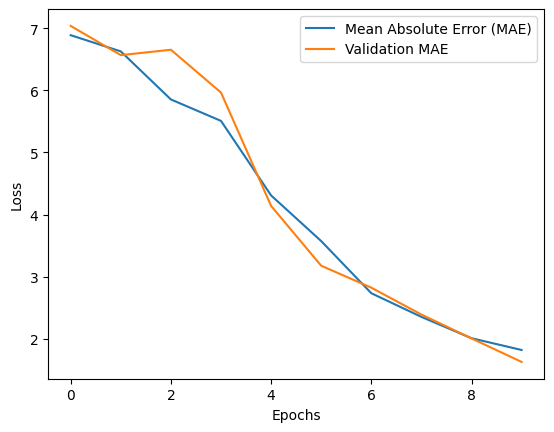

Epoch 1/10
5/5 [==============================] - 1s 3ms/step - loss: 13.3705
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 8.8149
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 6.4250
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 4.8023
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 4.4279
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 3.3546
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 2.8505
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 2.6719
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 2.6119
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 2.5784
Epoch 1/10
5/5 [==============================] - 0s 48ms/step - loss: 2.5436 - val_loss: 1.8090
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 2.5873 - val_loss: 1.9098
Epoch 3/10
5/5 [==================

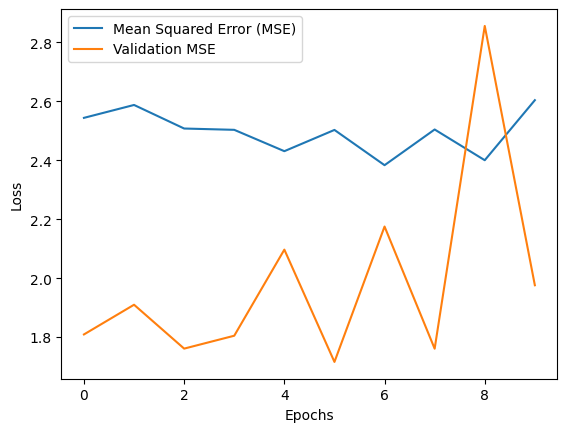

In [198]:
# Select independent variables
X = df.drop('Alcohol', axis=1)
y = df['Alcohol']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Better loss function is L1 loss with more constantly decresing loss. L1 loss model is learning and improving its performance on the training data, not like L2 loss.



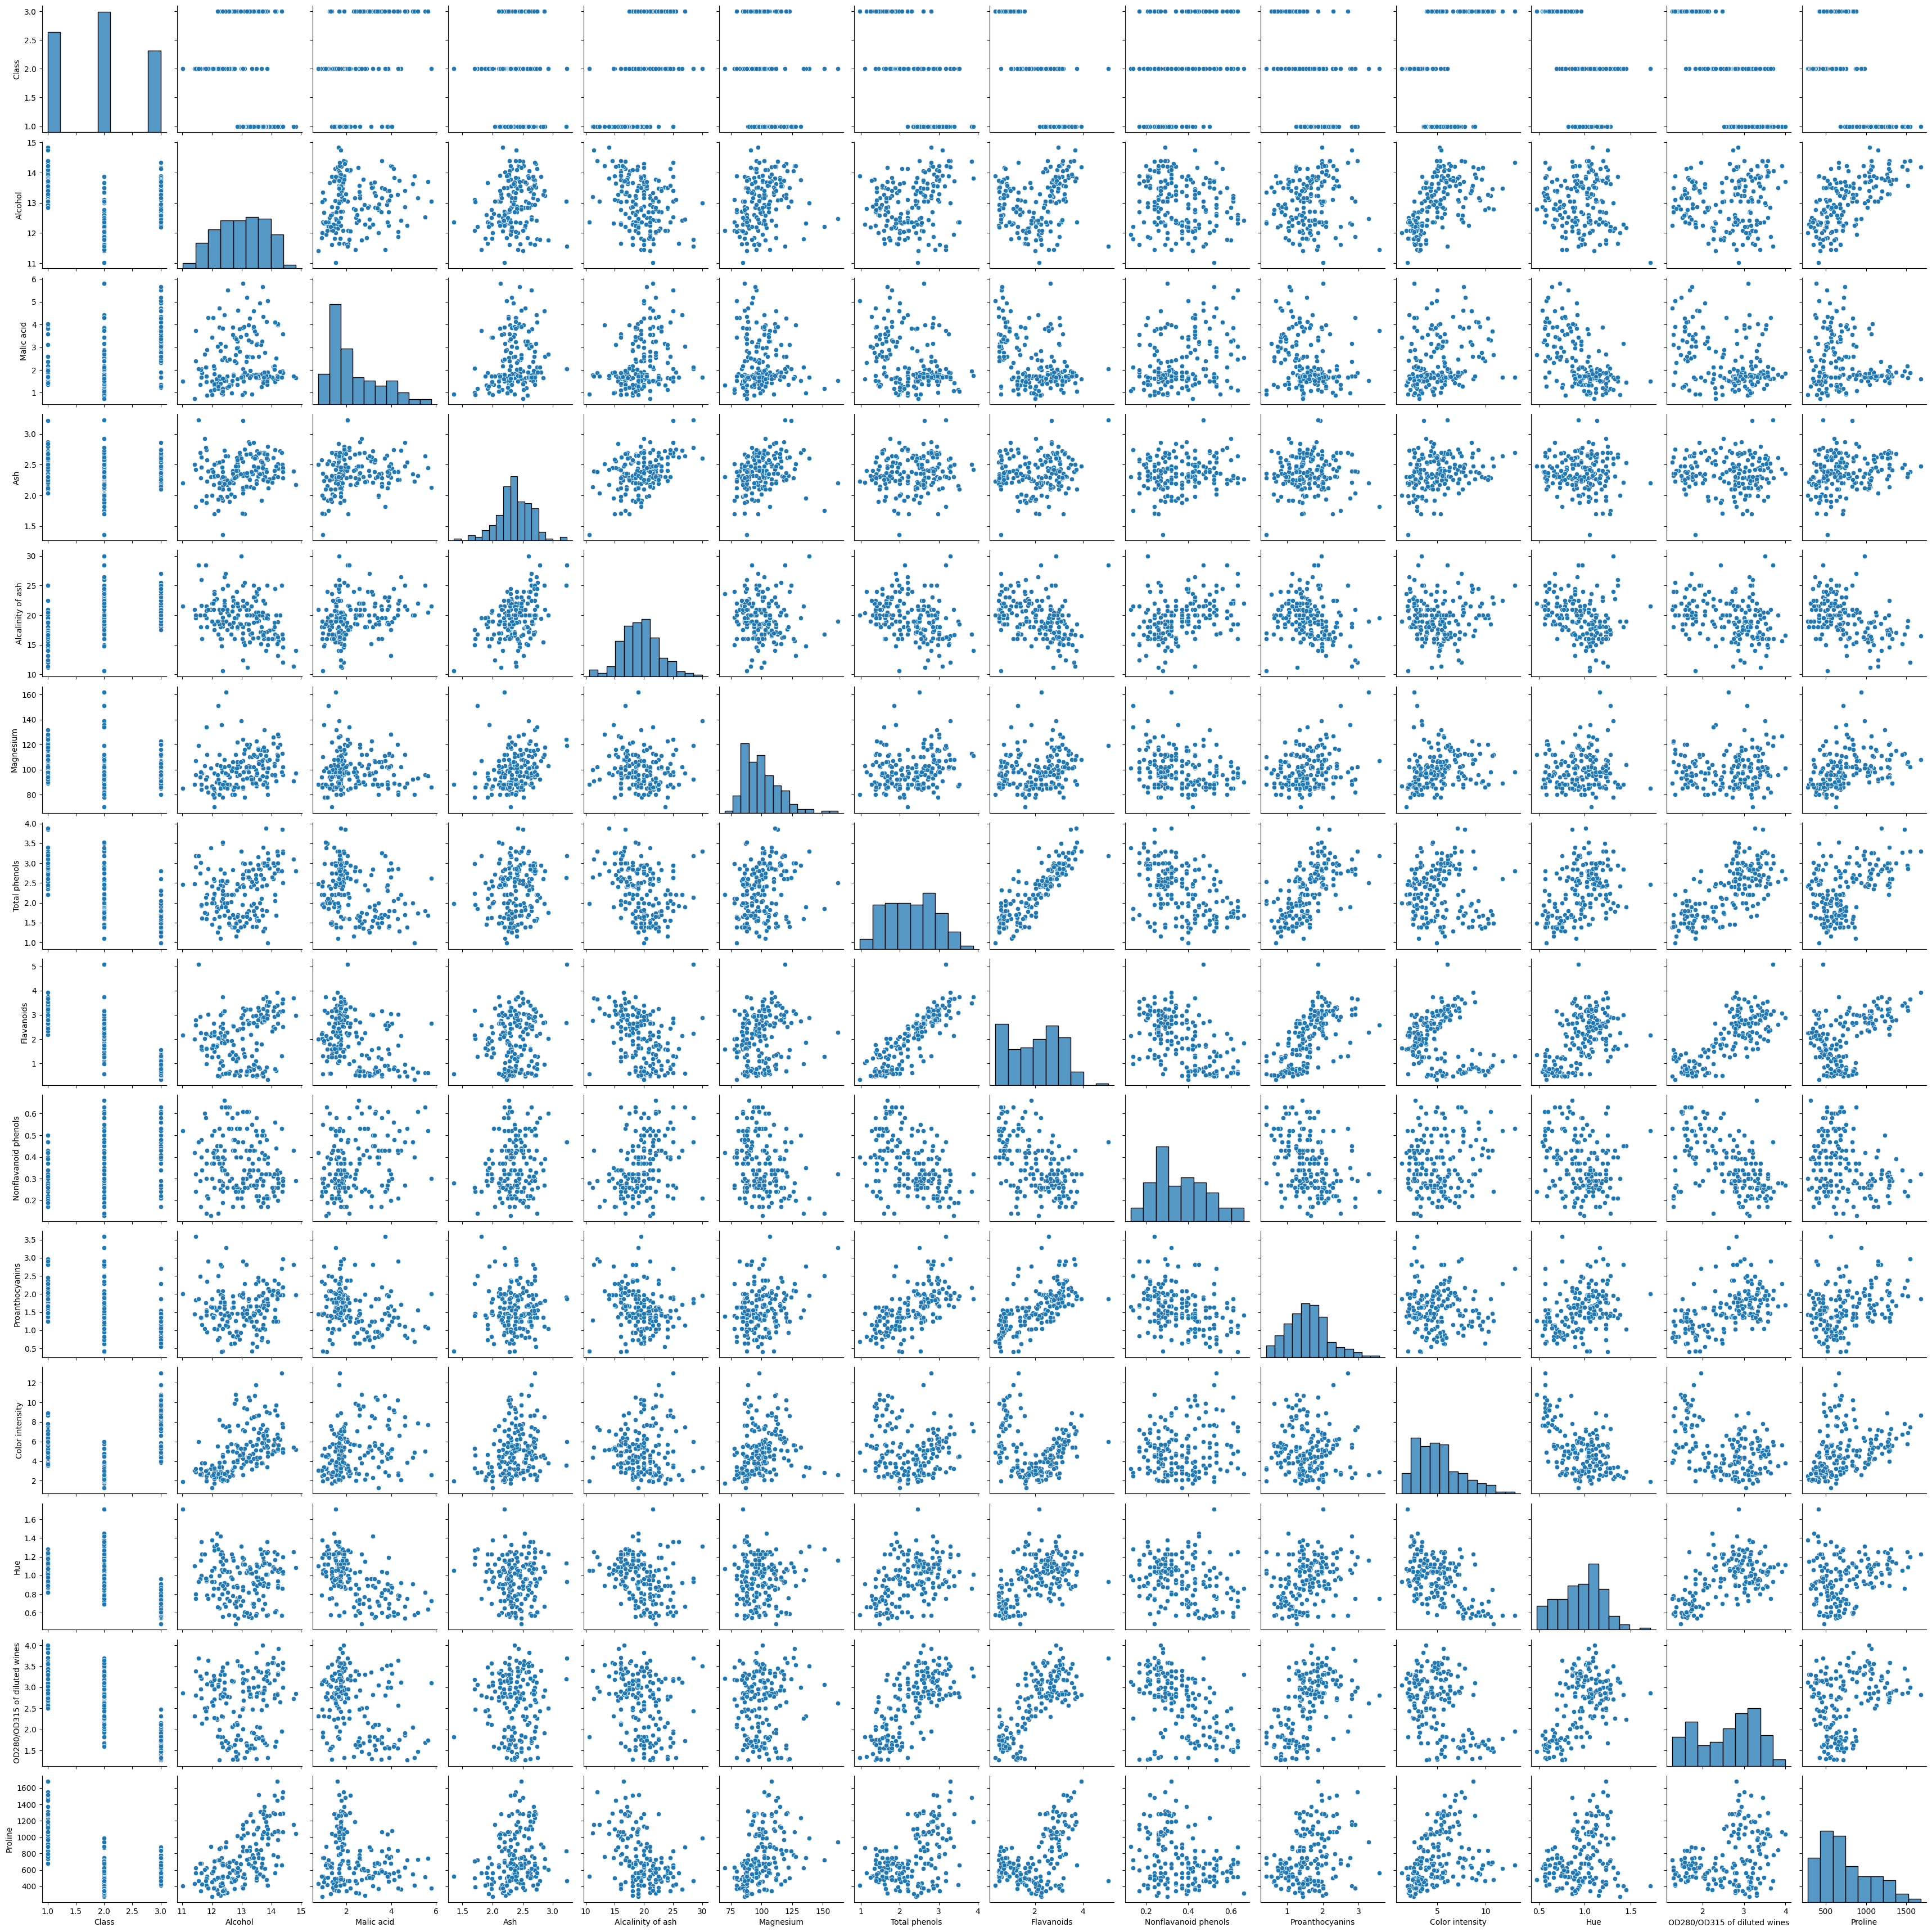

In [199]:
sns.pairplot(df)
plt.show()

We can see from plot above that dataset isn't Linear because data values are rather irregular

In [200]:
df.columns = df.columns.str.replace(' ', '_')
# ANOVA
formula = 'Class ~ Malic_acid + Alcalinity_of_ash + Magnesium + Total_phenols + Flavanoids + Nonflavanoid_phenols + Proanthocyanins + Color_intensity + Hue + Proline'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)
print('\n--------------')
formula = 'Alcohol ~ Malic_acid + Alcalinity_of_ash + Magnesium + Total_phenols + Flavanoids + Nonflavanoid_phenols + Proanthocyanins + Color_intensity + Hue + Proline'
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)
df.columns = df.columns.str.replace('_',' ')


                         sum_sq     df          F        PR(>F)
Malic_acid             0.004673    1.0   0.057828  8.102566e-01
Alcalinity_of_ash      1.633064    1.0  20.210884  1.292264e-05
Magnesium              0.000973    1.0   0.012041  9.127528e-01
Total_phenols          0.095427    1.0   1.181012  2.787161e-01
Flavanoids             7.130338    1.0  88.245443  4.282146e-17
Nonflavanoid_phenols   0.055102    1.0   0.681940  4.100975e-01
Proanthocyanins        0.098049    1.0   1.213457  2.722336e-01
Color_intensity        3.234085    1.0  40.025203  2.215781e-09
Hue                    0.148385    1.0   1.836423  1.772010e-01
Proline                6.631799    1.0  82.075494  3.381391e-16
Residual              13.493801  167.0        NaN           NaN

--------------
                         sum_sq     df          F        PR(>F)
Malic_acid             2.709927    1.0   9.393886  2.539395e-03
Alcalinity_of_ash      1.250076    1.0   4.333353  3.889784e-02
Magnesium              0

Variables such as Flavanoids, Color_intensity, Alcalinity_of_ash and Proline contribute significantly to the observed variation from the rest of observations regarding Wine Class.

Variables such as Malic_acid, Proline, Color_intensity contribute significantly to the observed variation from the rest of observations regarding Alcohol level.

In [201]:
# Bivariate correlation table
correlation_table = df[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Proline                      -0.633717  0.643720   -0.192011  0.223626   

                              Alcalinity of ash  Magnesium  Total phenols  \
Class                                  0.517859  -0.209179      -0.719163   
Alcohol                               -0.310235   0.270798       0.289101   
Malic acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
Class                          -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity of ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
Class                               -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity of ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins

Most vairables have negative correlation to others but there are some with positive correlation e.g Color_intensity is strongly dependant on many other factors. Alcohol is correlated to Proline and Color_intensity, Ash, Magnesium Flavanoids and Total phenols.

In [202]:
# Linear regression
# Define response variable
y = df['Alcohol']

# Define explanatory variables
x = df[non_categorical_columns].drop('Alcohol', axis=1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     20.32
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.07e-28
Time:                        17:05:03   Log-Likelihood:                -129.56
No. Observations:                 178   AIC:                             287.1
Df Residuals:                     164   BIC:                             331.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           12.6359      0.762     16.574      0.000      11.130      14.141
Class                           -0.4922      0.155     -3.166      0.002      -0.799      -0.185
Malic acid                       0.1389      0.044      3.146      0.002       0.052       0.226
Ash                              0.0568      0.213      0.267      0.790      -0.363       0.477
Alcalinity of ash               -0.0160      0.019     -0.857      0.393      -0.053       0.021
Magnesium                       -0.0002      0.003     -0.072      0.942      -0.007       0.006
Total phenols                    0.1201      0.132      0.908      0.365      -0.141       0.381
Flavanoids                      -0.1747      0.119     -1.465      0.145      -0.410       0.061
Nonflavanoid phenols            -0.3452      0.424     -0.813      0.417      -1.183       0.493
Proanthocyanins                 -0.1243      0.096     -1.294      0.197      -0.314       0.065
Color intensity                  0.1909      0.028      6.785      0.000       0.135       0.246
Hue                              0.1309      0.275      0.476      0.635      -0.412       0.674
OD280/OD315 of diluted wines     0.0186      0.116      0.161      0.873      -0.210       0.247
Proline                          0.0006      0.000      2.631      0.009       0.000       0.001
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.834
Skew:                           0.168   Prob(JB):                        0.659
Kurtosis:                       2.997   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Model shows a reasonably good fit, but some variables may not be significant predictors of Alcohol like: 'Ash,' 'Alcalinity of ash,' 'Magnesium,' 'Total phenols,' 'Flavanoids,' 'Nonflavanoid phenols,' 'Proanthocyanins,' 'Hue,' and 'OD280/OD315 of diluted wines'


 ------- regression_results -------
Mean Squared Error (MSE): 0.1726236294718678
Root Mean Squared Error (RMSE): 0.4154799988830603
Mean Absolute Error (MAE): 0.3574143615102692
R-squared (R2): 0.7108655314171186


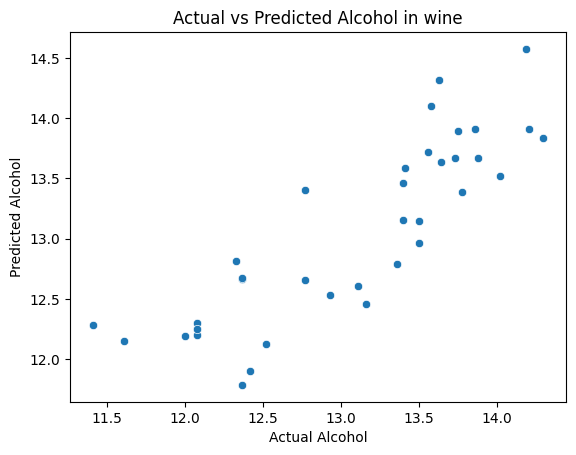

In [203]:
def regression(df):
    # Select independent variables
    X = df.drop('Alcohol', axis=1)
    y = df['Alcohol']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Regression Metrics
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Alcohol in wine')
    plt.xlabel('Actual Alcohol')
    plt.ylabel('Predicted Alcohol')
    plt.show()

print('\n ------- regression_results -------')
regression(df)

Model fit quite well as it more close to Linearity don't have strong deviations.It has relatively low errors (MSE, RMSE, and MAE) and the reasonably high R-squared value

## 6. Overfitting in the context of Regression

Degree-10 Polynomial Regression Results:
Training RMSE: 0.15444743075577017
Test RMSE: 10.400039098755345
Training R-squared: 0.9600670622834897
Test R-squared: -184.4185370096684


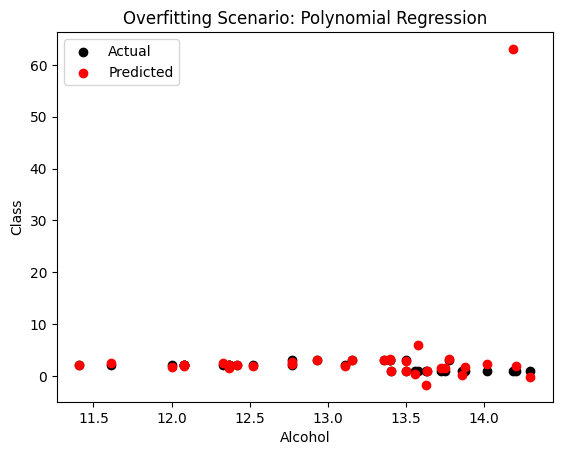

In [204]:
# Use a subset of features
selected_features = ['Alcohol', 'Flavanoids', 'Color intensity', 'Proline']

# Create a scenario for overfitting
df_subset = df[selected_features + ['Class']]

# Split the data into features (X) and target variable (y)
X = df_subset.drop('Class', axis=1)
y = df_subset['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a high-degree polynomial regression model
degree = 10
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_poly)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Degree-{degree} Polynomial Regression Results:")
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

# Plot the results
plt.scatter(X_test['Alcohol'], y_test, color='black', label='Actual')
plt.scatter(X_test['Alcohol'], y_test_pred, color='red', label='Predicted')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.title('Overfitting Scenario: Polynomial Regression')
plt.show()


model performs rather well on the training data (as indicated by the high training R-squared and low training RMSE), but it fails to generalize to the test data, resulting is significantly negative test R-squared and a high test RMSE.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e-02, tolerance: 8.482e-03
  model = cd_fast.enet_coordinate_descent(


Ridge Regression Results:
Training RMSE: 0.1764189631993655
Test RMSE: 0.7351373481254299
Training R-squared: 0.9478972776902199
Test R-squared: 0.07355385038476081

Lasso Regression Results:
Training RMSE: 0.2427629955807611
Test RMSE: 0.29906612006153066
Training R-squared: 0.9013414200515798
Test R-squared: 0.8466733528537294


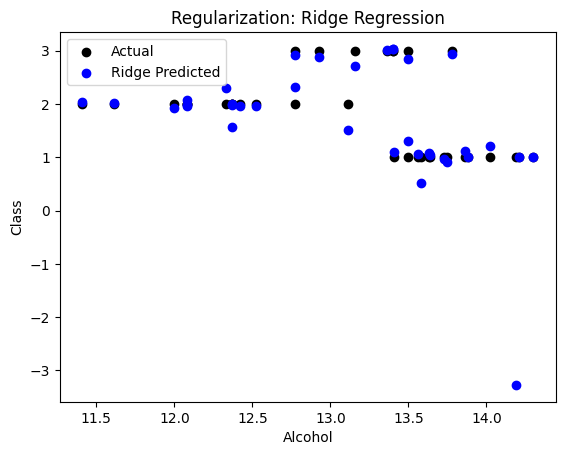

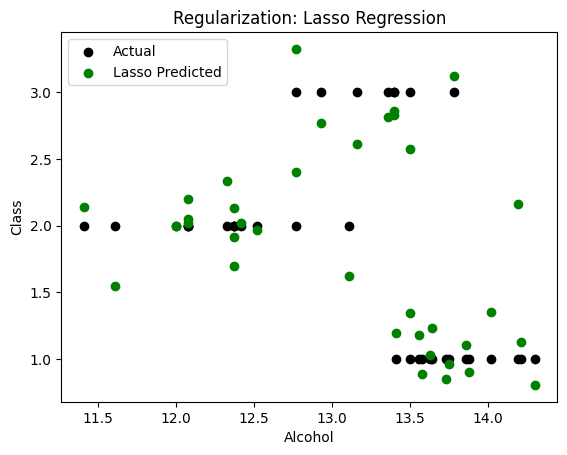

In [205]:
# Ridge Regression
alpha_ridge = 1.0
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=alpha_ridge))
ridge_model.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred_ridge = ridge_model.predict(X_train_poly)

# Predict on the test set
y_test_pred_ridge = ridge_model.predict(X_test_poly)

# Evaluate Ridge Regression
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Lasso Regression
alpha_lasso = 0.01
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=alpha_lasso))
lasso_model.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred_lasso = lasso_model.predict(X_train_poly)

# Predict on the test set
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# Evaluate Lasso Regression
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print the results
print("Ridge Regression Results:")
print(f"Training RMSE: {train_rmse_ridge}")
print(f"Test RMSE: {test_rmse_ridge}")
print(f"Training R-squared: {r2_train_ridge}")
print(f"Test R-squared: {r2_test_ridge}")

print("\nLasso Regression Results:")
print(f"Training RMSE: {train_rmse_lasso}")
print(f"Test RMSE: {test_rmse_lasso}")
print(f"Training R-squared: {r2_train_lasso}")
print(f"Test R-squared: {r2_test_lasso}")

# Plot the results for Ridge Regression
plt.scatter(X_test['Alcohol'], y_test, color='black', label='Actual')
plt.scatter(X_test['Alcohol'], y_test_pred_ridge, color='blue', label='Ridge Predicted')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.title('Regularization: Ridge Regression')
plt.show()

# Plot the results for Lasso Regression
plt.scatter(X_test['Alcohol'], y_test, color='black', label='Actual')
plt.scatter(X_test['Alcohol'], y_test_pred_lasso, color='green', label='Lasso Predicted')
plt.xlabel('Alcohol')
plt.ylabel('Class')
plt.legend()
plt.title('Regularization: Lasso Regression')
plt.show()


As we see from plots and metrics Ridge and Lasso regression show rather good results in terms of controlling overfitting and new data might be predicted well with this model.

8. Apply Decision Tree on both of it without and with pruning and record your observations

In [206]:
X = df.drop('Class', axis=1)
y = df['Class']
lab_enc = preprocessing.LabelEncoder()
X_encoded = X.apply(preprocessing.LabelEncoder().fit_transform)
y_encoded = (lab_enc.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
# Decision Tree without pruning for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_classifier = dt_classifier.predict(X_test)

# Print Classification Report
print("Decision Tree without Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier))

# Decision Tree with pruning for Classification
dt_classifier_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
dt_classifier_pruned.fit(X_train, y_train)
y_pred_classifier_pruned = dt_classifier_pruned.predict(X_test)

# Print Classification Report for Pruned Tree
print("Decision Tree with Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier_pruned))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree without pruning for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_regressor = dt_regressor.predict(X_test)

# Print Regression Metrics
print("Decision Tree without Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor))

# Decision Tree with pruning for Regression
dt_regressor_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01)
dt_regressor_pruned.fit(X_train, y_train)
y_pred_regressor_pruned = dt_regressor_pruned.predict(X_test)

# Print Regression Metrics for Pruned Tree
print("Decision Tree with Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor_pruned))

Decision Tree without Pruning (Classification):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Decision Tree with Pruning (Classification):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Decision Tree without Pruning (Regression):
Mean Squared Error: 0.16666666666666666
Decision Tree with Pruning (Regression):
Mean Squared Error: 

From table we can acknowlede decision tree gives really good accuracy to the model, pruning does not significantly change classification performance or regression accuracy

## ------------------------------V2_MASTER_PhonesmartdataAll_CCI_AdvStats--------------------------------




In [207]:
df1

Year  Age  GenderNum  AutismQuotient  STAI  BRIEF_Total  Device  \
0    2022   16        2.0               4    49           70  iphone   
1    2021   37        2.0               8    44           33  iphone   
2    2022   16        1.0               4    20           40  iphone   
3    2022   16        1.0               2    21            0  iphone   
4    2022   16        2.0               4    21            0  iphone   
..    ...  ...        ...             ...   ...          ...     ...   
543  2020   38        1.0               3    56           39  iPhone   
544  2020   27        2.0               5    64           77  iPhone   
545  2020   36        2.0               2    46           43  iPhone   
546  2020   31        2.0               4    67           69  iPhone   
547  2020   35        2.0               1    42           24  iPhone   

     DailyAvgMins  DailyAvePickups  VS_RT_correct_Conjunction  \
0               0               32                1178.700000   
1               0               32                 946.470000   
2               0               32                1182.741667   
3               0               32                1778.950000   
4               0               32                 521.500000   
..            ...              ...                        ...   
543           507               32                 915.785917   
544           267               32                 877.783333   
545           610               32                1211.483333   
546           558               32                 899.774583   
547            88               32                1048.395417   

     VS_RT_correct_Single  Mean_VS_RT_correct_Single  \
0             1216.387500                 827.116332   
1              785.597500                        NaN   
2              950.900000                        NaN   
3              984.333333                        NaN   
4              503.000000                        NaN   
..                    ...                        ...   
543            747.883194                        NaN   
544            720.729583                        NaN   
545           1049.979167                        NaN   
546            845.612083                        NaN   
547            792.282500                        NaN   

     Mean_VS_RT_correct_Conjunction  
0                        925.624053  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
..                              ...  
543                             NaN  
544                             NaN  
545                             NaN  
546                             NaN  
547                             NaN  

[548 rows x 13 columns]

In [208]:
df1.describe()

Year         Age   GenderNum  AutismQuotient        STAI  \
count   548.000000  548.000000  543.000000      548.000000  548.000000   
mean   2020.711679   29.677007    1.788214        3.237226   46.985401   
std       0.731187    8.828638    0.435179        1.741609   11.955576   
min    2020.000000   16.000000    1.000000        0.000000   20.000000   
25%    2020.000000   24.000000    2.000000        2.000000   39.000000   
50%    2021.000000   28.500000    2.000000        3.000000   47.000000   
75%    2021.000000   34.000000    2.000000        4.000000   55.000000   
max    2022.000000  101.000000    3.000000       10.000000   77.000000   

       BRIEF_Total  DailyAvgMins  DailyAvePickups  VS_RT_correct_Conjunction  \
count   548.000000    548.000000       548.000000                 548.000000   
mean     50.470803    181.753650        49.394161                 942.567275   
std      25.344736    177.331993        36.985764                 195.525323   
min       0.000000      0.000000        32.000000                 521.500000   
25%      33.000000      0.000000        32.000000                 823.408271   
50%      49.000000    169.500000        32.000000                 903.227792   
75%      67.000000    297.000000        32.000000                1012.179167   
max     140.000000   1157.000000       272.000000                2125.150000   

       VS_RT_correct_Single  Mean_VS_RT_correct_Single  \
count            548.000000                   1.000000   
mean             841.467643                 827.116332   
std              172.026277                        NaN   
min              503.000000                 827.116332   
25%              730.852768                 827.116332   
50%              796.977778                 827.116332   
75%              886.148194                 827.116332   
max             1896.975000                 827.116332   

       Mean_VS_RT_correct_Conjunction  
count                        1.000000  
mean                       925.624053  
std                               NaN  
min                        925.624053  
25%                        925.624053  
50%                        925.624053  
75%                        925.624053  
max                        925.624053

In [209]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            548 non-null    int64  
 1   Age                             548 non-null    int64  
 2   GenderNum                       543 non-null    float64
 3   AutismQuotient                  548 non-null    int64  
 4   STAI                            548 non-null    int64  
 5   BRIEF_Total                     548 non-null    int64  
 6   Device                          548 non-null    object 
 7   DailyAvgMins                    548 non-null    int64  
 8   DailyAvePickups                 548 non-null    int64  
 9   VS_RT_correct_Conjunction       548 non-null    float64
 10  VS_RT_correct_Single            548 non-null    float64
 11  Mean_VS_RT_correct_Single       1 non-null      float64
 12  Mean_VS_RT_correct_Conjunction  1 no

dataframe is mostly numerical with one categorical column Device

In [210]:
# Classify variables
categorical_columns = df1.select_dtypes(include=['object']).columns
non_categorical_columns = df1.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['Device'], dtype='object')

Non-Categorical Columns:
Index(['Year', 'Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total',
       'DailyAvgMins', 'DailyAvePickups', 'VS_RT_correct_Conjunction',
       'VS_RT_correct_Single', 'Mean_VS_RT_correct_Single',
       'Mean_VS_RT_correct_Conjunction'],
      dtype='object')


Exploratory Analysis

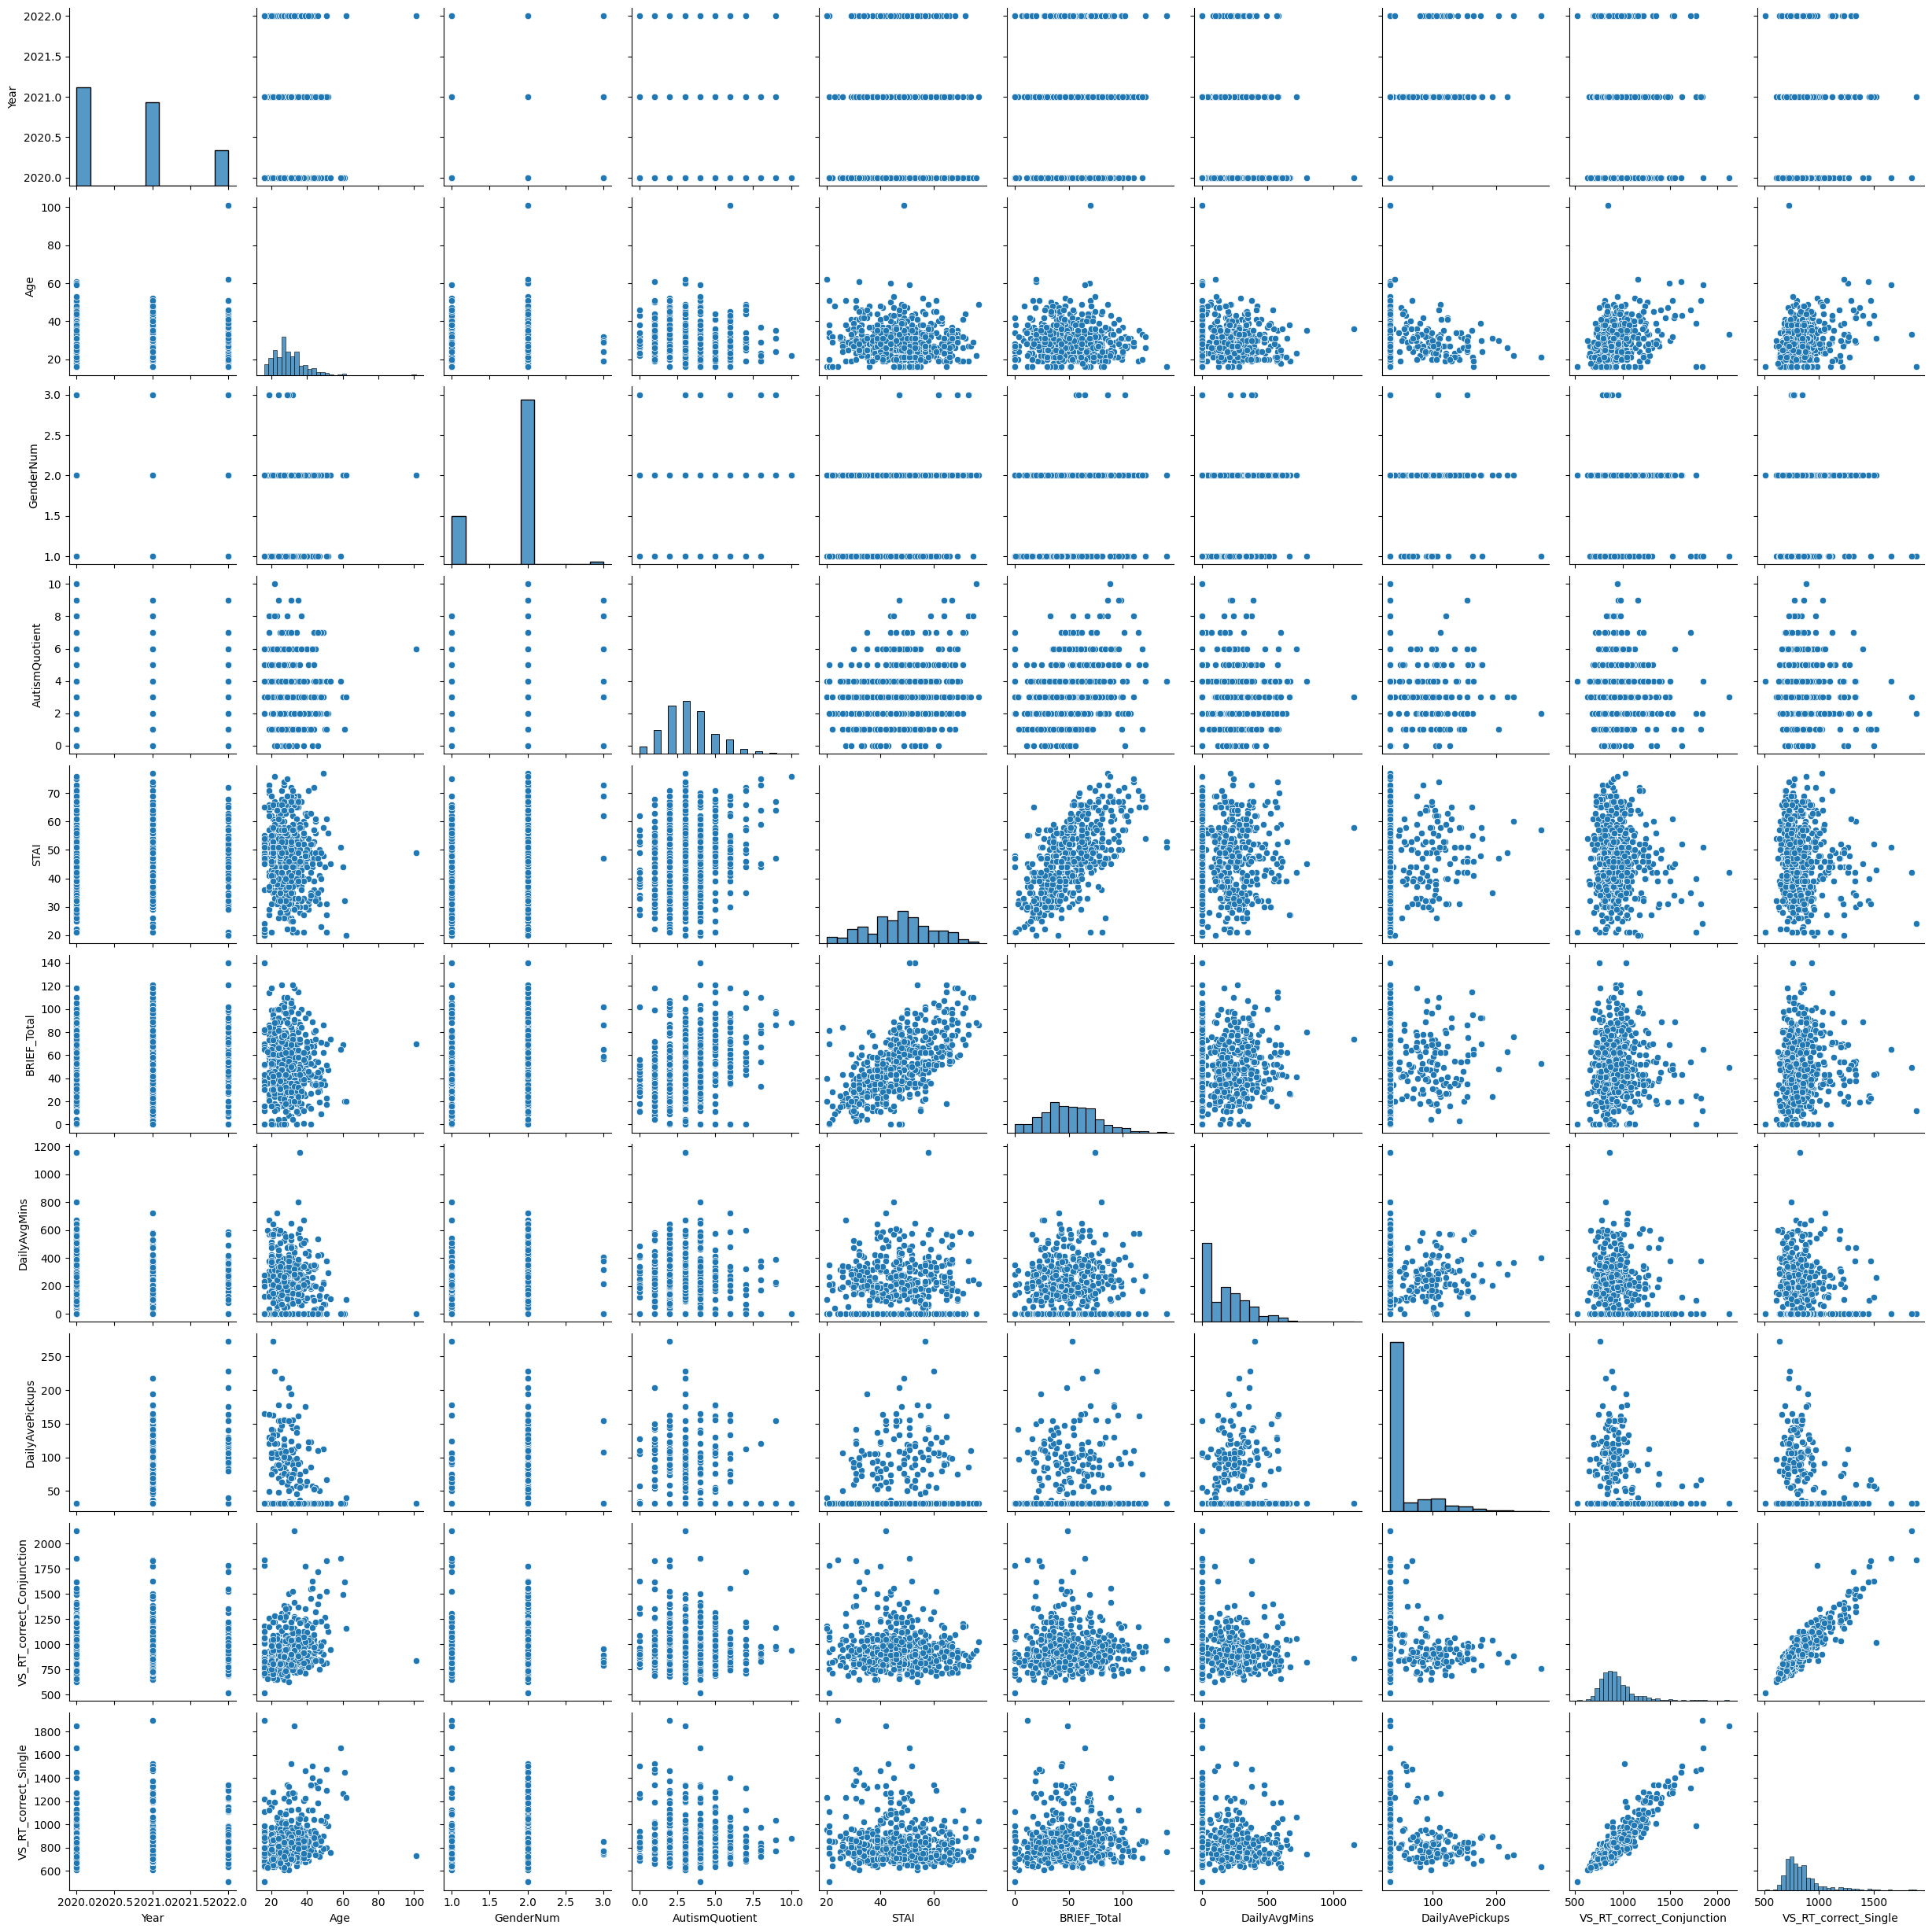

In [211]:
# Visualize the relationship between variables
sns.pairplot(df1[non_categorical_columns].drop(columns=['Mean_VS_RT_correct_Conjunction',	'Mean_VS_RT_correct_Single']))
plt.show()

From plots we can understand that many of column values are divided into groups and are not continous. It can also be seen that data set in not Linear.

## 2. loss functions

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 178.7072
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 178.6369
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 178.5847
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 178.5276
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 178.4561
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 178.3791
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 178.2946
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 178.1914
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 178.0814
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 177.9633
Epoch 1/20
14/14 [==============================] - 0s 15ms/step - loss: 177.8147 - val_loss: 192.6949
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 177.6845 - val

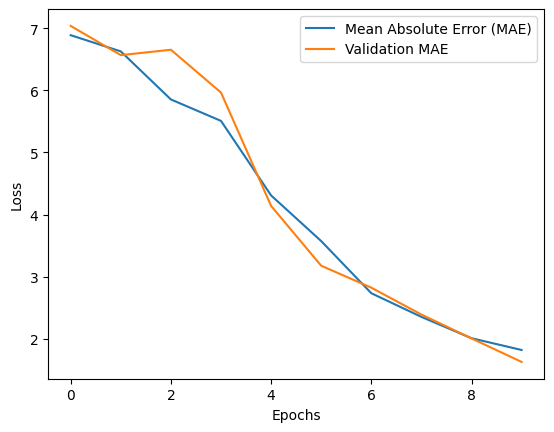

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 56363.4062
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 56042.7578
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 55699.1250
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 55359.5039
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 55007.7578
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 54647.9219
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 54271.6445
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 53897.4297
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 53503.8086
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 53111.0820
Epoch 1/20
14/14 [==============================] - 0s 13ms/step - loss: 52706.6758 - val_loss: 55350.4922
Epoch 2/20
14/14 [==============================] - 0s 4ms/ste

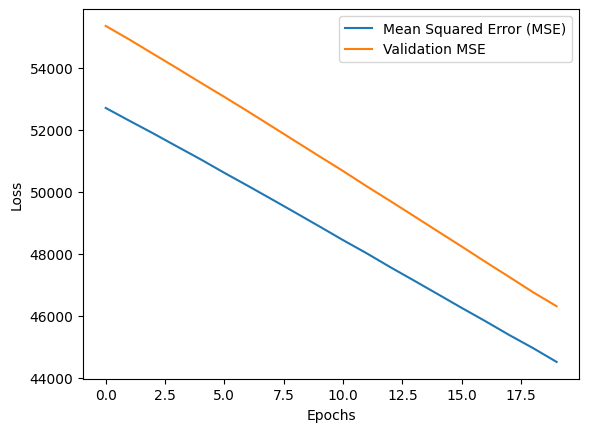

In [212]:
# Select independent variables
X = df1[['Age', 'STAI', 'BRIEF_Total','DailyAvePickups', 'VS_RT_correct_Conjunction', 'VS_RT_correct_Single']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df1['DailyAvgMins']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

L1 and L2 loss model is learning and improving its performance on the training data. Results suggest that the neural network is learning effectively.


In [213]:
# Bivariate correlation table
correlation_table = df1[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


Year       Age  GenderNum  AutismQuotient  \
Year                            1.000000 -0.014169  -0.001453        0.088263   
Age                            -0.014169  1.000000   0.033383       -0.078235   
GenderNum                      -0.001453  0.033383   1.000000       -0.055103   
AutismQuotient                  0.088263 -0.078235  -0.055103        1.000000   
STAI                            0.027123 -0.074555   0.107345        0.244425   
BRIEF_Total                     0.079353 -0.034091   0.023189        0.295085   
DailyAvgMins                   -0.185560 -0.048672   0.055532       -0.111035   
DailyAvePickups                 0.358031 -0.087632   0.079455       -0.035852   
VS_RT_correct_Conjunction       0.029299  0.294910  -0.012430       -0.008032   
VS_RT_correct_Single            0.056883  0.286206   0.002312       -0.009739   
Mean_VS_RT_correct_Single            NaN       NaN        NaN             NaN   
Mean_VS_RT_correct_Conjunction       NaN       NaN        NaN             NaN   

                                    STAI  BRIEF_Total  DailyAvgMins  \
Year                            0.027123     0.079353     -0.185560   
Age                            -0.074555    -0.034091     -0.048672   
GenderNum                       0.107345     0.023189      0.055532   
AutismQuotient                  0.244425     0.295085     -0.111035   
STAI                            1.000000     0.632384     -0.011529   
BRIEF_Total                     0.632384     1.000000      0.026128   
DailyAvgMins                   -0.011529     0.026128      1.000000   
DailyAvePickups                 0.075362     0.069539      0.247063   
VS_RT_correct_Conjunction      -0.107461    -0.017695     -0.119006   
VS_RT_correct_Single           -0.090532    -0.000901     -0.120915   
Mean_VS_RT_correct_Single            NaN          NaN           NaN   
Mean_VS_RT_correct_Conjunction       NaN          NaN           NaN   

                                DailyAvePickups  VS_RT_correct_Conjunction  \
Year                                   0.358031                   0.029299   
Age                                   -0.087632                   0.294910   
GenderNum                              0.079455                  -0.012430   
AutismQuotient                        -0.035852                  -0.008032   
STAI                                   0.075362                  -0.107461   
BRIEF_Total                            0.069539                  -0.017695   
DailyAvgMins                           0.247063                  -0.119006   
DailyAvePickups                        1.000000                  -0.078721   
VS_RT_correct_Conjunction             -0.078721                   1.000000   
VS_RT_correct_Single                  -0.078193                   0.903221   
Mean_VS_RT_correct_Single                   NaN                        NaN   
Mean_VS_RT_correct_Conjunction              NaN                        NaN   

                                VS_RT_correct_Single  \
Year                                        0.056883   
Age                                         0.286206   
GenderNum                                   0.002312   
AutismQuotient                             -0.009739   
STAI                                       -0.090532   
BRIEF_Total                                -0.000901   
DailyAvgMins                               -0.120915   
DailyAvePickups                            -0.078193   
VS_RT_correct_Conjunction                   0.903221   
VS_RT_correct_Single                        1.000000   
Mean_VS_RT_correct_Single                        NaN   
Mean_VS_RT_correct_Conjunction                   NaN   

                                Mean_VS_RT_correct_Single  \
Year                                                  NaN   
Age                                                   NaN   
GenderNum                                             NaN   
AutismQuotient                                        NaN   
STAI     

Corelation is rather divided with more negative corelations. For example strong positive correlation is between two variables: "DailyAvePickups" and "DailyAvgMins". For instance, "DailyAvePickups" and "Age" have negative correlation coefficient.

Inferential Analysis

In [214]:
formula = 'VS_RT_correct_Single ~ BRIEF_Total + Age + AutismQuotient + STAI + GenderNum + DailyAvgMins + DailyAvePickups'
model = ols(formula, data=df1).fit()
# Perform ANOVA
anova_table = anova_lm(model, typ=2)

print(anova_table)
print("\n------------------------------")

formula = 'VS_RT_correct_Conjunction ~ BRIEF_Total + Age + AutismQuotient + STAI + GenderNum + DailyAvgMins + DailyAvePickups'
model = ols(formula, data=df1).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

                       sum_sq     df          F        PR(>F)
BRIEF_Total      7.831078e+04    1.0   2.927113  8.768278e-02
Age              1.185839e+06    1.0  44.324495  6.909751e-11
AutismQuotient   1.012218e+01    1.0   0.000378  9.844884e-01
STAI             1.434152e+05    1.0   5.360596  2.097415e-02
GenderNum        2.425887e+03    1.0   0.090675  7.634375e-01
DailyAvgMins     1.672905e+05    1.0   6.253012  1.269625e-02
DailyAvePickups  1.229689e+04    1.0   0.459635  4.980876e-01
Residual         1.431317e+07  535.0        NaN           NaN

------------------------------
                       sum_sq     df          F        PR(>F)
BRIEF_Total      7.297917e+04    1.0   2.123560  1.456357e-01
Age              1.637836e+06    1.0  47.658022  1.442163e-11
AutismQuotient   1.287262e+03    1.0   0.037457  8.466111e-01
STAI             2.107901e+05    1.0   6.133606  1.357169e-02
GenderNum        4.029924e+01    1.0   0.001173  9.726956e-01
DailyAvgMins     1.893255e+05    1.0  

Only Age contribute significantly to the observed variation from the rest of observations regarding VS_RT_correct_Single and VS_RT_correct_Conjunction.

In [215]:
# Linear regression
# Define response variable
y = df1['VS_RT_correct_Single']

# Define explanatory variables
x = df1[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins']]

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.104
Model:                              OLS   Adj. R-squared:                  0.097
Method:                   Least Squares   F-statistic:                     15.71
Date:                  Mon, 04 Dec 2023   Prob (F-statistic):           3.56e-12
Time:                          17:05:52   Log-Likelihood:                -3568.0
No. Observations:                   548   AIC:                             7146.
Df Residuals:                       543   BIC:                             7167.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          758.8115     39.545     19.188      0.000     681.131     836.492
Age              5.3433      0.795      6.722      0.000       3.782       6.905
STAI            -1.8836      0.757     -2.488      0.013      -3.371      -0.397
BRIEF_Total      0.6390      0.356      1.793      0.074      -0.061       1.339
DailyAvgMins    -0.1082      0.040     -2.739      0.006      -0.186      -0.031
==============================================================================
Omnibus:                      258.610   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.169
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      10.242   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Model explains 10.4% of the DV variance. 15.71 with a very low p-value (3.56e-12) so at least one factor is significant to DV. Overall "Age," "STAI," and "DailyAvgMins" are significant predictors of "VS_RT_correct_Single," with "BRIEF_Total" being marginally significant.


 ------- regression_results -------
Mean Squared Error (MSE): 17868.666292620128
Root Mean Squared Error (RMSE): 133.6737307499874
Mean Absolute Error (MAE): 102.29022759213551
R-squared (R2): 0.11028322372171906


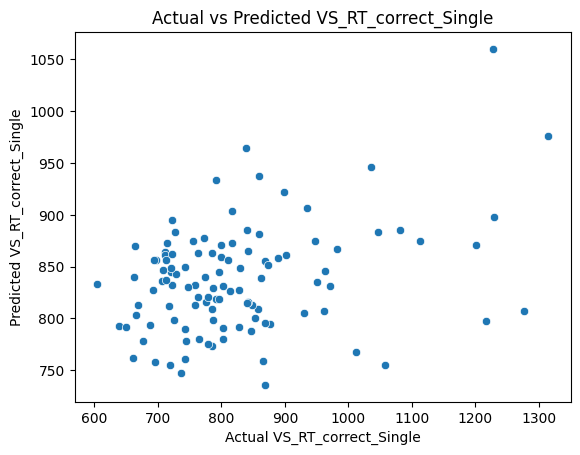

In [216]:
def regression(df):
    # Select independent variables
    X = df1[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins']]
    y = df1['VS_RT_correct_Single']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted VS_RT_correct_Single')
    plt.xlabel('Actual VS_RT_correct_Single')
    plt.ylabel('Predicted VS_RT_correct_Single')
    plt.show()

print('\n ------- regression_results -------')
regression(df1)

Model has a relatively high level of error of the high MSE, RMSE, and MAE. The R-squared value explains only a small part of the variability in the data.

8. Apply Decision Tree on both of it without and with pruning and record your observations

In [217]:
X = df1[['DailyAvgMins','STAI', 'BRIEF_Total','Age', 'VS_RT_correct_Conjunction', 'VS_RT_correct_Single']]
y = df1['GenderNum']

lab_enc = preprocessing.LabelEncoder()
X_encoded = X.apply(preprocessing.LabelEncoder().fit_transform)
y_encoded = (lab_enc.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Decision Tree without pruning for Classification
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_classifier = dt_classifier.predict(X_test)

# Print Classification Report
print("Decision Tree without Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier))

# Decision Tree with pruning for Classification
dt_classifier_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
dt_classifier_pruned.fit(X_train, y_train)
y_pred_classifier_pruned = dt_classifier_pruned.predict(X_test)

# Print Classification Report for Pruned Tree
print("Decision Tree with Pruning (Classification):")
print(metrics.classification_report(y_test, y_pred_classifier_pruned))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree without pruning for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_regressor = dt_regressor.predict(X_test)

# Print Regression Metrics
print("Decision Tree without Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor))

# Decision Tree with pruning for Regression
dt_regressor_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01)
dt_regressor_pruned.fit(X_train, y_train)
y_pred_regressor_pruned = dt_regressor_pruned.predict(X_test)

# Print Regression Metrics for Pruned Tree
print("Decision Tree with Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor_pruned))
print('\n\n')

Decision Tree without Pruning (Classification):
              precision    recall  f1-score   support

           0       0.15      0.15      0.15        27
           1       0.72      0.72      0.72        81
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.56       110
   macro avg       0.22      0.22      0.22       110
weighted avg       0.57      0.56      0.57       110

Decision Tree with Pruning (Classification):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.74      1.00      0.85        81
           3       0.00      0.00      0.00         2

    accuracy                           0.74       110
   macro avg       0.25      0.33      0.28       110
weighted avg       0.54      0.74      0.62       110

Decision Tree without Pruning (Regression):
Mean Squared Error: 0.5272727272727272
Decision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

From table we can acknowlede decision tree do not have so good accuracy to the model, pruning significantly change classification performance or regression accuracy by increasing it.

# -------------------------------Housing-------------------------------------------------

In [218]:
df2

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In this dataset there are few categorical columns

In [219]:
df2.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [220]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Categorical and numerical columns are split closely by 50/50

In [221]:
categorical_columns = df2.select_dtypes(include=['object']).columns
non_categorical_columns = df2.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

Non-Categorical Columns:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


Exploratory Analysis


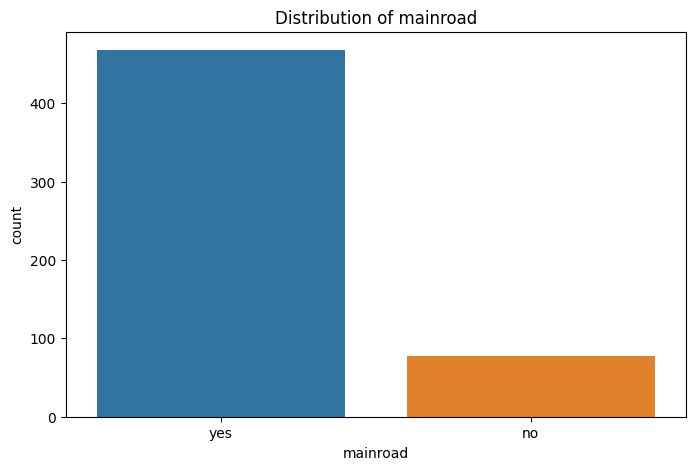

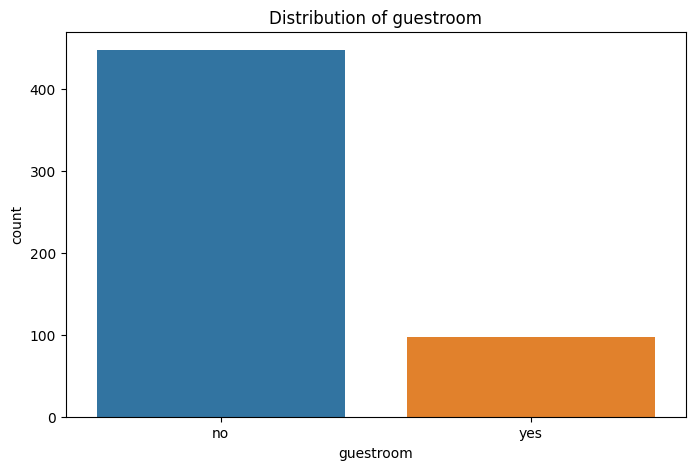

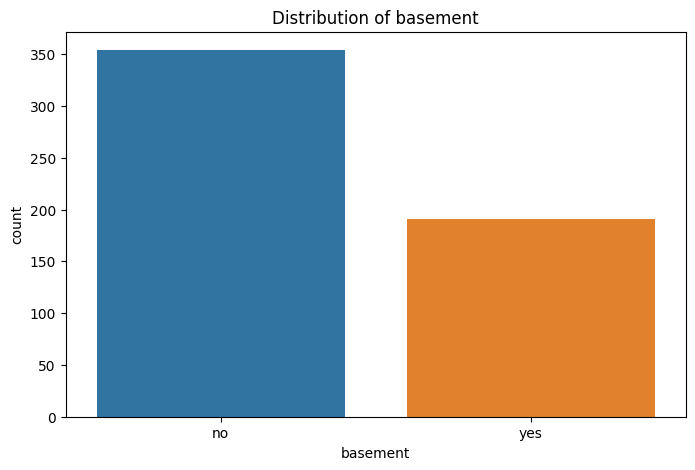

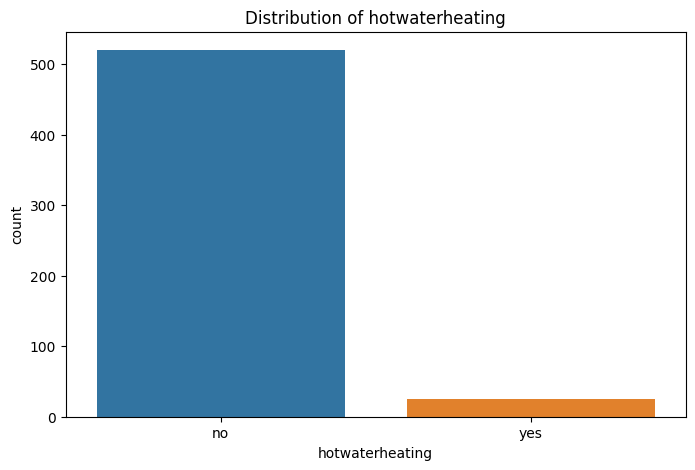

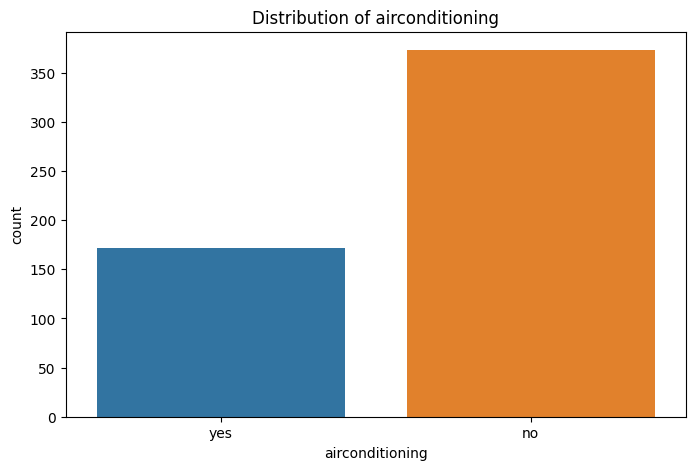

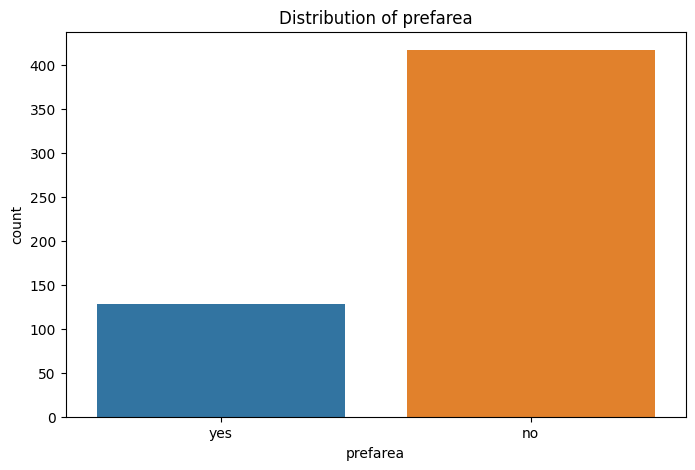

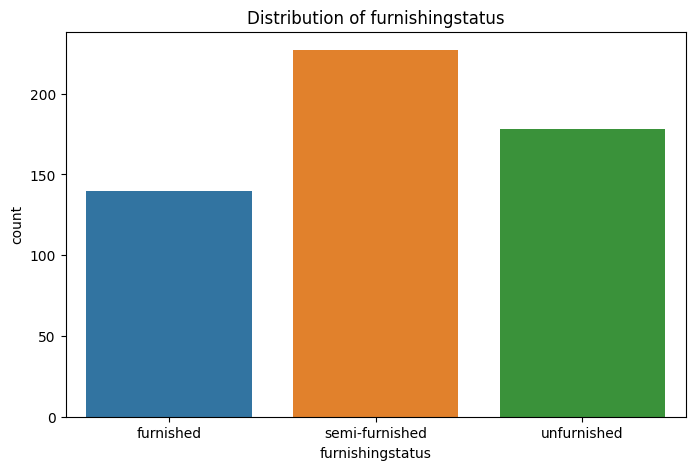

In [222]:
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df2)
    plt.title(f'Distribution of {column}')
    plt.show()

Charts preview that categorical values are rather dominated by one value. Also, there are most semi-furnished houses

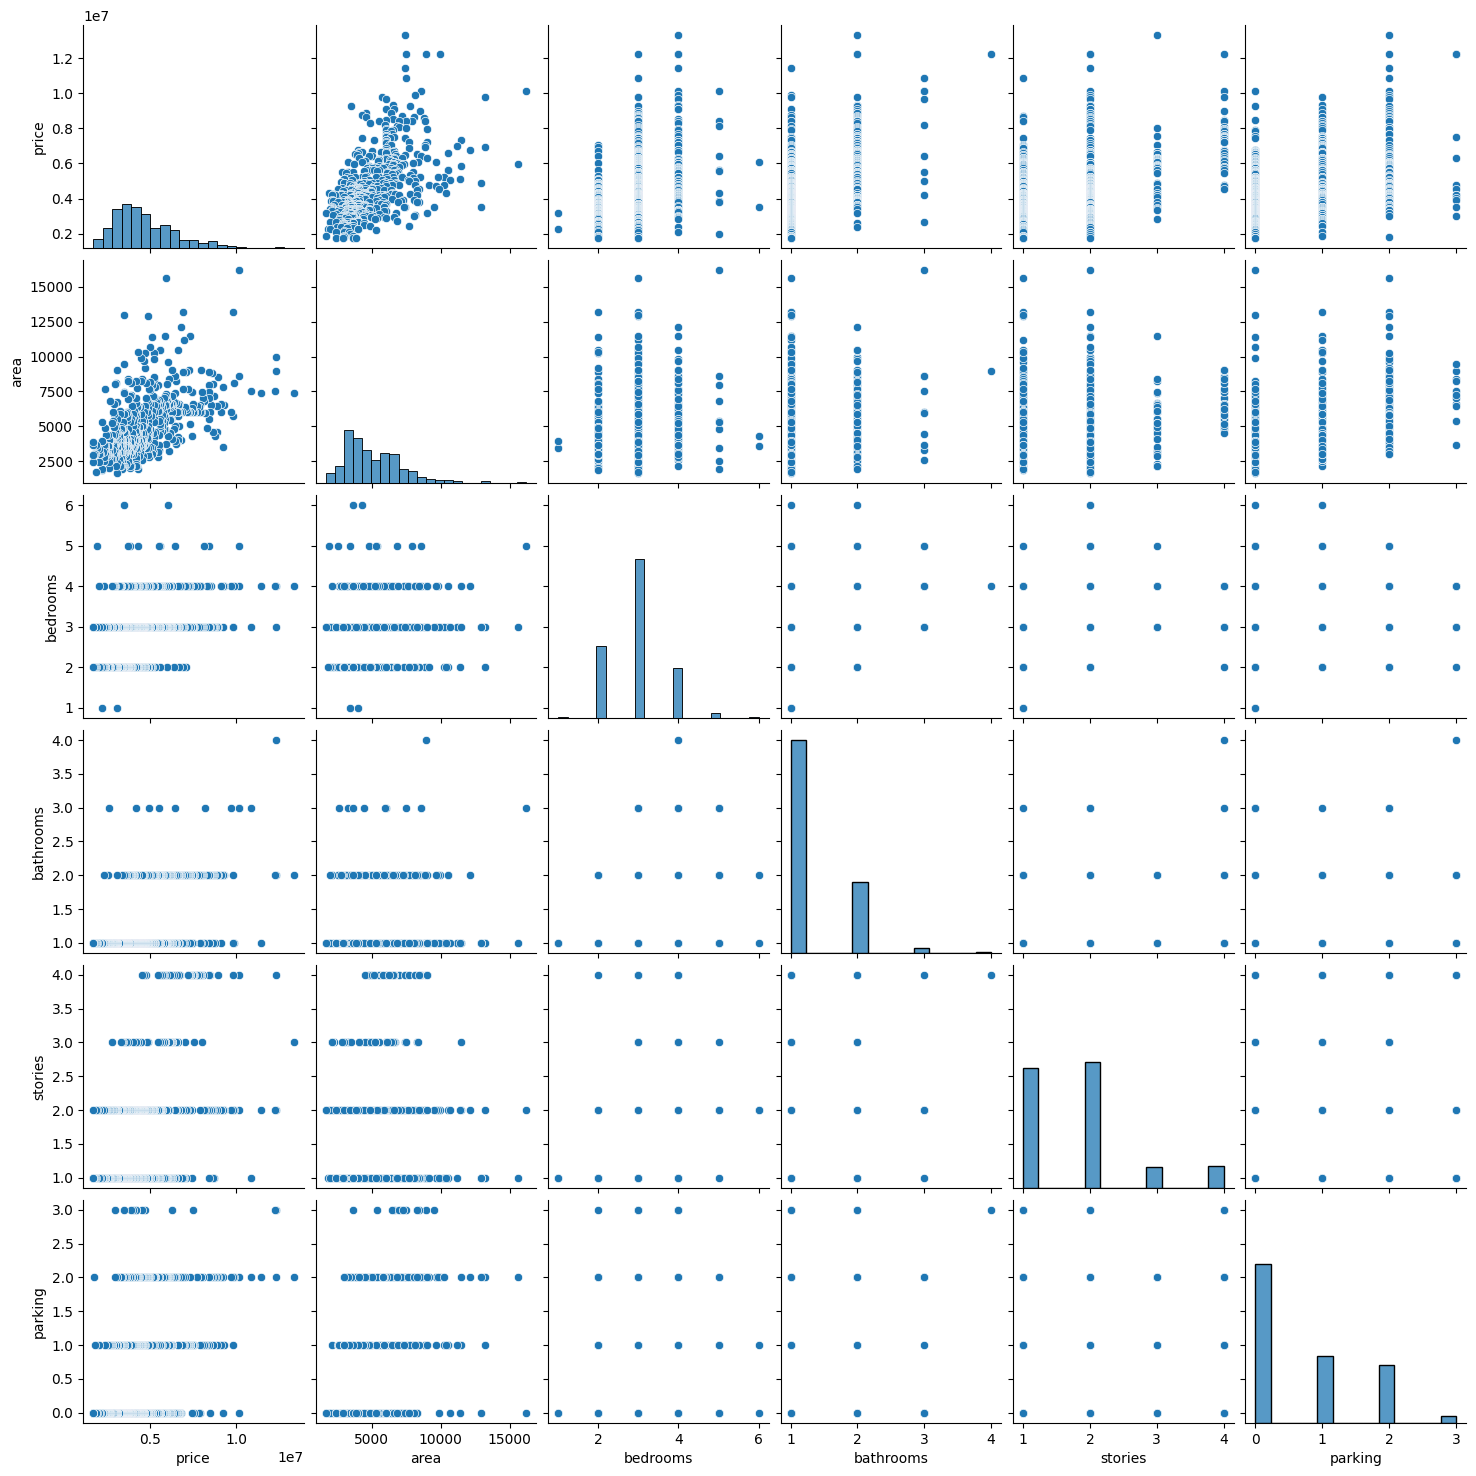

In [223]:
# Visualize the relationship between variables
sns.pairplot(df2)
plt.show()

There are only two continous values from dataset area and price but are not Linear. Rest of data is divided into numerical or non-numerical categories.

## 2. Regression Loss Functions

Epoch 1/10
14/14 [==============================] - 1s 4ms/step - loss: 4706527.5000
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 4706527.5000
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 4706526.5000
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 4706526.5000
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 4706527.0000
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 4706526.0000
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 4706526.0000
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 4706525.5000
Epoch 9/10
14/14 [==============================] - 0s 4ms/step - loss: 4706525.5000
Epoch 10/10
14/14 [==============================] - 0s 3ms/step - loss: 4706525.5000
Epoch 1/10
14/14 [==============================] - 1s 3ms/step - loss: 25234767872000.0000
Epoch 2/10
14/14 [==============================] - 0s 3m

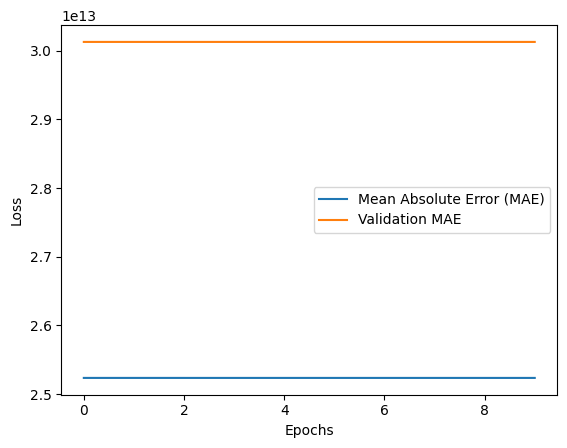

Epoch 1/10
14/14 [==============================] - 0s 13ms/step - loss: 24806133071872.0000 - val_loss: 29629182115840.0000
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 24737057079296.0000 - val_loss: 29553548328960.0000
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 24668469723136.0000 - val_loss: 29480487747584.0000
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 24602944208896.0000 - val_loss: 29410637905920.0000
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 24539431960576.0000 - val_loss: 29344208519168.0000
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 24477974921216.0000 - val_loss: 29278928371712.0000
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 24417933459456.0000 - val_loss: 29214115889152.0000
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 24358013632512.0000 - val_loss: 29150100324352.0000
Epoch 9

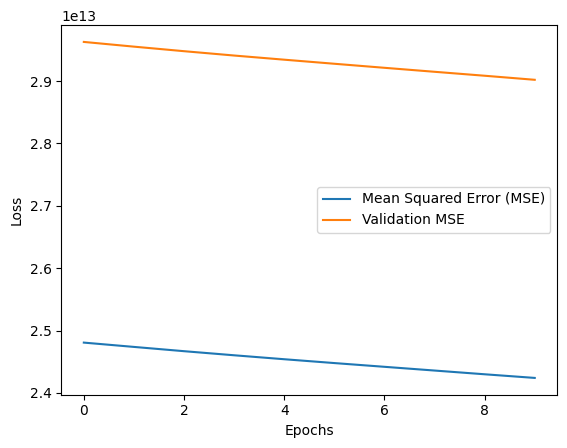

In [224]:
# Select independent variables
X = df2[['area']]
y = df2['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Train the model with mean_absolute_error loss
history1 = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Even after scaling L1 and L2 loss metrics works really pourly due to many values divided into groups that are not continous.

In [225]:
for i in categorical_columns:
    for j in categorical_columns:
      if(i != j):
        contingency_table = pd.crosstab(df2[i], df2[j])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        print(f"\n   {i} to {j}")
        print(f"Chi-square Statistic: {chi2_stat}")
        print(f"P-Value: {p_value}")


   mainroad to guestroom
Chi-square Statistic: 3.9795041257080426
P-Value: 0.046057120173070724

   mainroad to basement
Chi-square Statistic: 0.8070526921051583
P-Value: 0.3689930603385009

   mainroad to hotwaterheating
Chi-square Statistic: 0.0
P-Value: 1.0

   mainroad to airconditioning
Chi-square Statistic: 5.423398828005372
P-Value: 0.019868646257879218

   mainroad to prefarea
Chi-square Statistic: 20.44030075548806
P-Value: 6.1520545272850425e-06

   mainroad to furnishingstatus
Chi-square Statistic: 13.387091804589472
P-Value: 0.0012388820206534878

   guestroom to mainroad
Chi-square Statistic: 3.9795041257080426
P-Value: 0.046057120173070724

   guestroom to basement
Chi-square Statistic: 73.42092315009108
P-Value: 1.047497924951445e-17

   guestroom to hotwaterheating
Chi-square Statistic: 0.0
P-Value: 1.0

   guestroom to airconditioning
Chi-square Statistic: 9.643099519178861
P-Value: 0.0019006424383250094

   guestroom to prefarea
Chi-square Statistic: 13.1340118771534

The highier Chi-square the better dependance between categorical variables

In [226]:
# Bivariate correlation table
correlation_table = df2[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000

Every factor have positive correlation to other ones it means that factors in dataset are rather connected

In [227]:
# Linear regression
# Define response variable
df_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

y = df2['price']

# Define explanatory variables
x = df_encoded.drop('price', axis = 1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          9.07e-123
Time:                        17:06:15   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model gives 68% of R2 and F-statistics rather high it means that there are some variables that are significantly defining price


 ------- regression_results -------
Mean Squared Error (MSE): 1754318687330.6677
Root Mean Squared Error (RMSE): 1324506.96009144
Mean Absolute Error (MAE): 970043.4039201642
R-squared (R2): 0.6529242642153177


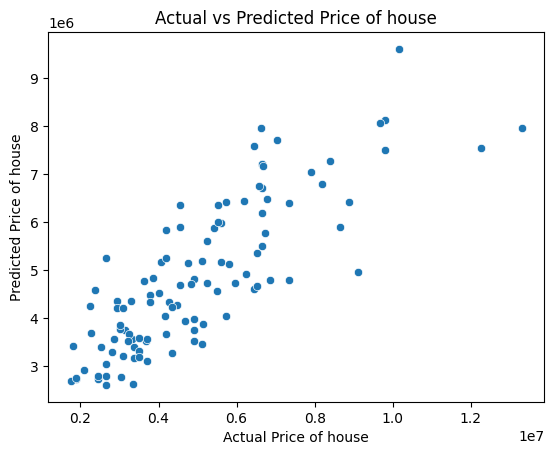

In [228]:
def linear_regression(df):
    # Select independent variables
    y = df['price']

    # Define explanatory variables
    X = df.drop('price', axis = 1)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted Price of house')
    plt.xlabel('Actual Price of house')
    plt.ylabel('Predicted Price of house')
    plt.show()

print('\n ------- regression_results -------')
linear_regression(df_encoded)

Mean squared error is really high with 65% R2 so we can undersand that model will not predict new data so well

In [229]:
# Mapping for 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
binary_mapping = {'yes': 1, 'no': 0}

# Mapping for 'furnishingstatus'
furnishing_mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}

# Apply mappings to the relevant columns
df2['mainroad'] = df2['mainroad'].map(binary_mapping)
df2['guestroom'] = df2['guestroom'].map(binary_mapping)
df2['basement'] = df2['basement'].map(binary_mapping)
df2['hotwaterheating'] = df2['hotwaterheating'].map(binary_mapping)
df2['airconditioning'] = df2['airconditioning'].map(binary_mapping)
df2['prefarea'] = df2['prefarea'].map(binary_mapping)

df2['furnishingstatus'] = df2['furnishingstatus'].map(furnishing_mapping)

# Print the modified DataFrame


Changed categorical values to numerical

In [230]:
df2

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     furnishingstatus  
0                   2  
1                   2  
2                   1  
3                   2  
4                   2  
..                ...  
540                 0  
541                 1  
542                 0  
543                 2  
544                 0  

[545 rows x 13 columns]

In [231]:
# Select independent variables
y = df2['prefarea']

# Define explanatory variables
X = df2.drop('prefarea', axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

print('\n ------- regression_results -------')
# Classification Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





 ------- regression_results -------
Accuracy: 0.8165137614678899
Precision: 0.8
Recall: 0.3076923076923077
F1 Score: 0.4444444444444444
Confusion Matrix:
 [[81  2]
 [18  8]]


True Positive (TP): 81 values were correctly predicted as 'prefarea.'

True Negative (TN): 2 values were correctly predicted as 'not prefarea.'

False Positive (FP): 18 values were incorrectly predicted as 'prefarea.'

False Negative (FN): 8 values incorrectly predicted as 'not prefarea.'

accuracy is high so model might predict new data well

In [232]:
df2[categorical_columns]

mainroad  guestroom  basement  hotwaterheating  airconditioning  \
0           1          0         0                0                1   
1           1          0         0                0                1   
2           1          0         1                0                0   
3           1          0         1                0                1   
4           1          1         1                0                1   
..        ...        ...       ...              ...              ...   
540         1          0         1                0                0   
541         0          0         0                0                0   
542         1          0         0                0                0   
543         0          0         0                0                0   
544         1          0         0                0                0   

     prefarea  furnishingstatus  
0           1                 2  
1           0                 2  
2           1                 1  
3           1                 2  
4           0                 2  
..        ...               ...  
540         0                 0  
541         0                 1  
542         0                 0  
543         0                 2  
544         0                 0  

[545 rows x 7 columns]

## 2. Classification Loss Functions

In [233]:
# Select independent variables
y = df2['prefarea']

# Define explanatory variables
X = df2[categorical_columns].drop('prefarea', axis = 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict probabilities for each class
y_probs = model.predict_proba(X_test)

# Log Loss
logloss = log_loss(y_test, y_probs)
print("Log Loss:", logloss)

# Categorical Cross-Entropy Loss
categorical_crossentropy_loss = categorical_crossentropy(np.eye(np.max(y_test) + 1)[y_test], y_probs)
print("Categorical Cross-Entropy Loss:", categorical_crossentropy_loss)

# Hinge Loss
# Convert labels to -1 (negative class) and 1 (positive class)
y_hinge = np.where(y_test == 0, -1, 1)
hinge_loss_value = hinge_loss(y_hinge, model.decision_function(X_test))
print("Hinge Loss:", hinge_loss_value)

Log Loss: 0.5120364349498607
Categorical Cross-Entropy Loss: tf.Tensor(
[0.05059566 1.47715351 0.20249983 0.23646015 0.22227335 0.18432725
 0.25914201 0.7661195  0.03478994 0.0278282  1.55787701 0.18432725
 0.02690585 0.05595609 0.37691089 0.03478994 0.20249983 0.21555582
 0.37691089 0.20249983 1.64037803 0.72966234 0.18432725 0.88208668
 0.41054865 1.08852208 0.53429607 0.62513959 0.91416914 0.22227335
 0.97739925 0.18432725 0.37595583 0.20249983 0.18432725 0.23646015
 0.57840156 0.43440066 0.02690585 0.22227335 0.20249983 0.21555582
 1.47715351 0.22227335 0.20249983 0.21555582 0.23646015 0.20249983
 0.18432725 0.37691089 0.21555582 0.18432725 0.22227335 0.06615864
 0.37691089 0.0278282  1.30686083 0.18432725 0.20249983 0.18432725
 0.41054865 0.02268764 0.23646015 0.43440066 1.78179092 0.13670577
 1.02114183 0.37691089 0.18432725 0.67744171 3.00908058 1.69655815
 0.22227335 0.91416914 0.21555582 0.13670577 0.20249983 1.55787701
 0.25914201 3.6288342  1.47715351 0.20249983 0.7661195  1

 Model seems to be performing well based on these metrics(between 0 and 1). The Loss functions are rather low so model is making accurate predictions on the test set.

## 7. Overfitting in the context of Classification



Accuracy: 0.7614678899082569
Precision: 0.8777777777777778
Recall: 0.8404255319148937
F1 Score: 0.858695652173913
Confusion Matrix:
 [[ 4 11]
 [15 79]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


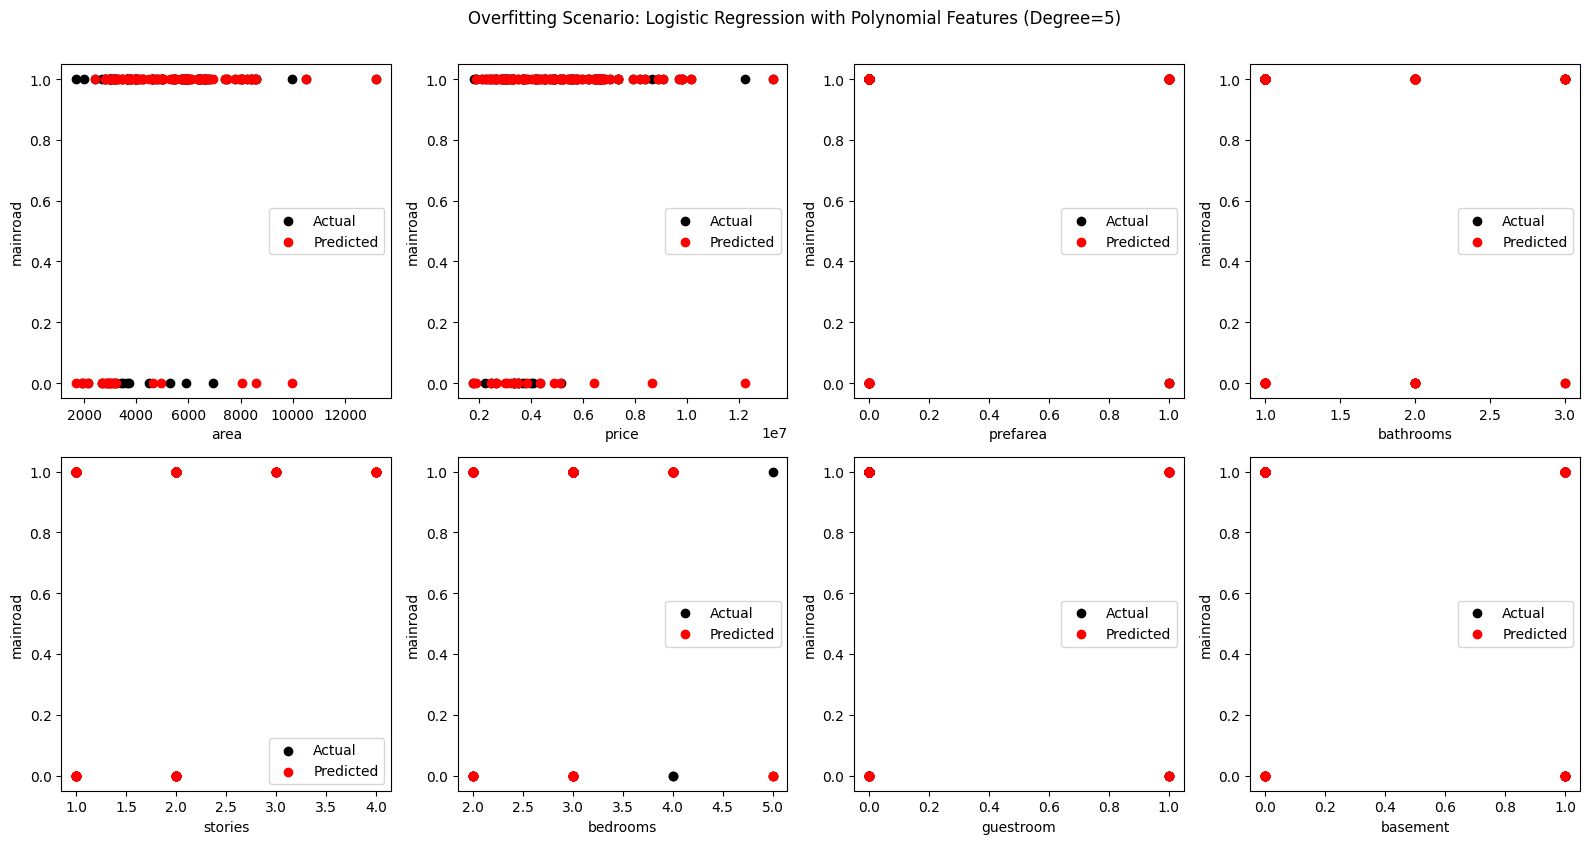

In [234]:
# Creating subset of features to increase model complexity
selected_features = ['area', 'price', 'prefarea', 'bathrooms', 'stories', 'bedrooms', 'guestroom', 'basement']
df_subset = df2[selected_features + ['mainroad']]

# Split the data into features (X) and target variable (y)
X = df_subset.drop('mainroad', axis=1)
y = df_subset['mainroad']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a logistic regression model with polynomial features
degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Predict on the test data
y_test_pred = model.predict(X_test_poly)

# Classification Metrics
print("\n\nAccuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, feature in enumerate(selected_features):
    row, col = divmod(i, 4)

    axes[row, col].scatter(X_test[feature], y_test, color='black', label='Actual')
    axes[row, col].scatter(X_test[feature], y_test_pred, color='red', label='Predicted')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('mainroad')  # Corrected the ylabel to 'bedrooms'
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()
plt.suptitle(f'Overfitting Scenario: Logistic Regression with Polynomial Features (Degree={degree})', y=1.05)
plt.show()

From confusion matrix:
True Positive (TP): 79 values were correctly predicted as 'mainroad.'
True Negative (TN): 4 values were correctly predicted as 'not mainroad.'
False Positive (FP): 11 values were incorrectly predicted as 'mainroad.'
False Negative (FN): 15 values incorrectly predicted as 'not mainroad.'

High accuracy on the training data but model might not be predicting new data well - sign of overfitting. Also on charts it can be seen that noise at some points occurs.

Ridge Regression Results:
Training RMSE: 0.23951594778914712
Test RMSE: 1.0900403418593614
Training R-squared: 0.5296961241167454
Test R-squared: -9.011958153823869

Lasso Regression Results:
Training RMSE: 0.30136486142055385
Test RMSE: 0.3332817671950751
Training R-squared: 0.2554482086567733
Test R-squared: 0.06404063509854585


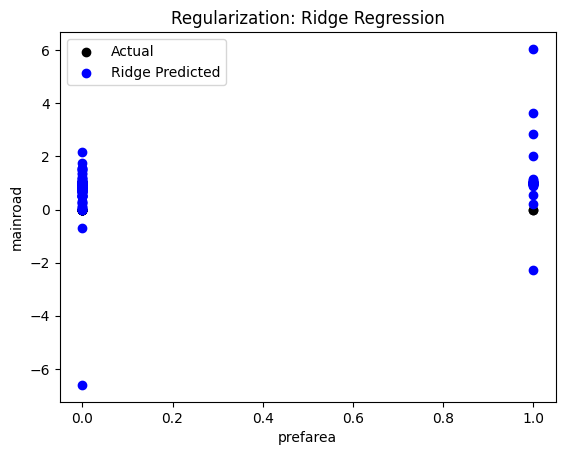

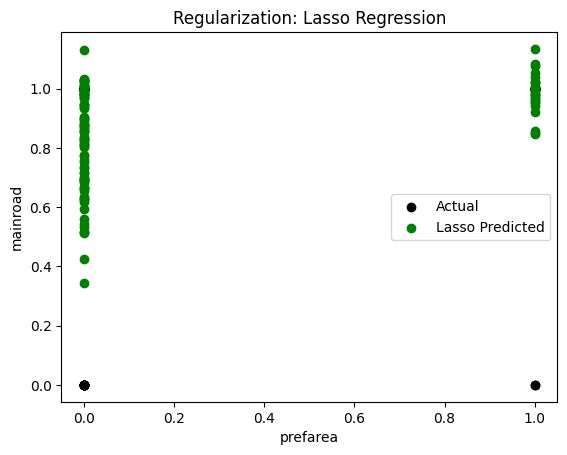

In [235]:
# Ridge Regression
alpha_ridge = 1.0  # You can adjust the alpha parameter
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=alpha_ridge))
ridge_model.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred_ridge = ridge_model.predict(X_train_poly)

# Predict on the test set
y_test_pred_ridge = ridge_model.predict(X_test_poly)

# Evaluate Ridge Regression
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Lasso Regression
alpha_lasso = 0.01  # You can adjust the alpha parameter
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=alpha_lasso))
lasso_model.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred_lasso = lasso_model.predict(X_train_poly)

# Predict on the test set
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# Evaluate Lasso Regression
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print the results
print("Ridge Regression Results:")
print(f"Training RMSE: {train_rmse_ridge}")
print(f"Test RMSE: {test_rmse_ridge}")
print(f"Training R-squared: {r2_train_ridge}")
print(f"Test R-squared: {r2_test_ridge}")

print("\nLasso Regression Results:")
print(f"Training RMSE: {train_rmse_lasso}")
print(f"Test RMSE: {test_rmse_lasso}")
print(f"Training R-squared: {r2_train_lasso}")
print(f"Test R-squared: {r2_test_lasso}")

# Plot the results for Ridge Regression
plt.scatter(X_test['prefarea'], y_test, color='black', label='Actual')
plt.scatter(X_test['prefarea'], y_test_pred_ridge, color='blue', label='Ridge Predicted')
plt.xlabel('prefarea')
plt.ylabel('mainroad')
plt.legend()
plt.title('Regularization: Ridge Regression')
plt.show()

# Plot the results for Lasso Regression
plt.scatter(X_test['prefarea'], y_test, color='black', label='Actual')
plt.scatter(X_test['prefarea'], y_test_pred_lasso, color='green', label='Lasso Predicted')
plt.xlabel('prefarea')
plt.ylabel('mainroad')
plt.legend()
plt.title('Regularization: Lasso Regression')
plt.show()


The negative R-squared for Ridge regression may suggest that the model does not generalize well to new data.
Lasso has positive test R-squared can provide better fit for new data

## -----------------------data---------------------------------------------------------

In [236]:
df3

filename       tempo  beats  chroma_stft      rmse  \
0    blues.00081.au  103.359375     50     0.380260  0.248262   
1    blues.00022.au   95.703125     44     0.306451  0.113475   
2    blues.00031.au  151.999081     75     0.253487  0.151571   
3    blues.00012.au  184.570312     91     0.269320  0.119072   
4    blues.00056.au  161.499023     74     0.391059  0.137728   
..              ...         ...    ...          ...       ...   
995   rock.00017.au  123.046875     59     0.418812  0.166056   
996   rock.00081.au  117.453835     56     0.335774  0.093676   
997   rock.00004.au  103.359375     45     0.372834  0.208743   
998   rock.00006.au  112.347147     45     0.344472  0.180163   
999   rock.00066.au   75.999540     36     0.360098  0.042995   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2116.942959         1956.611056  4196.107960            0.127272   
1          1156.070496         1497.668176  2170.053545            0.058613   
2          1331.073970         1973.643437  2900.174130            0.042967   
3          1361.045467         1567.804596  2739.625101            0.069124   
4          1811.076084         2052.332563  3927.809582            0.075480   
..                 ...                 ...          ...                 ...   
995        2312.030070         2060.825761  4528.197619            0.140588   
996        2553.856706         2219.090892  5123.752351            0.136173   
997        1345.850763         1841.748033  2939.265560            0.041099   
998        1675.475369         1653.422860  3253.563659            0.087294   
999        2209.357588         2175.214294  4575.588999            0.107147   

          mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0    -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1   -233.860772  ...  -2.250578   3.959198  5.322555  0.812028 -1.107202   
2   -221.802549  ... -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   
3   -207.208080  ...  -0.613248   0.384877  2.605128 -5.188924 -9.527455   
4   -145.434568  ...   7.457218 -10.470444 -2.360483 -6.783623  2.671134   
..          ...  ...        ...        ...       ...       ...       ...   
995  -41.402023  ...  11.303100 -14.155566  2.824157 -9.477822  3.331261   
996 -121.410791  ...   9.149520 -10.112054  4.211237 -9.349345  1.609701   
997 -127.946876  ...  11.043714  -8.385375  2.111019 -6.338260  0.997383   
998  -98.356322  ...   2.945863 -12.509212  0.091337 -0.774780 -5.700102   
999 -245.160921  ...   0.813777 -13.018359  0.053168 -8.232851  1.059255   

        mfcc17     mfcc18     mfcc19     mfcc20  label  
0    -6.829571   0.965922  -7.570825   2.918987  blues  
1    -4.556555  -2.436490   3.316913  -0.608485  blues  
2   -14.682694 -11.719264 -11.025216 -13.387260  blues  
3    -9.244394  -2.848274  -1.418707  -5.932607  blues  
4    -4.760879  -0.949005   0.024832  -2.005315  blues  
..         ...        ...        ...        ...    ...  
995  -8.200088   3.693091  -3.673562  -0.163201   rock  
996 -10.553566   1.066489  -1.654875   7.544224   rock  
997  -5.325869  -0.842192  -4.665996  -4.787677   rock  
998  -8.630916  -1.903803  -2.196753  -3.395148   rock  
999  -8.031864  -0.397097  -4.349921  -4.220998   rock  

[1000 rows x 30 columns]

In [237]:
df3.describe()

tempo        beats  chroma_stft         rmse  spectral_centroid  \
count  1000.000000  1000.000000  1000.000000  1000.000000        1000.000000   
mean    119.601702    57.138000     0.378656     0.130929        2201.834226   
std      28.297367    14.225728     0.081689     0.065685         715.961347   
min      54.978391    18.000000     0.171782     0.005276         569.930721   
25%      99.384014    47.000000     0.319641     0.086625        1627.793931   
50%     117.453835    56.000000     0.383075     0.122448        2209.468780   
75%     135.999178    65.250000     0.435974     0.175793        2691.969702   
max     234.907670   117.000000     0.663573     0.398012        4434.439444   

       spectral_bandwidth      rolloff  zero_crossing_rate        mfcc1  \
count         1000.000000  1000.000000         1000.000000  1000.000000   
mean          2242.559613  4571.702159            0.103637  -144.479173   
std            526.337663  1574.770035            0.041834   100.235661   
min            897.994319   749.062137            0.021701  -552.064063   
25%           1907.136505  3380.956639            0.070281  -200.695133   
50%           2221.408983  4658.671830            0.099539  -120.206072   
75%           2578.474352  5534.197785            0.132007   -73.895019   
max           3509.578677  8676.405868            0.274829    42.034587   

             mfcc2  ...       mfcc11       mfcc12       mfcc13       mfcc14  \
count  1000.000000  ...  1000.000000  1000.000000  1000.000000  1000.000000   
mean     99.552199  ...    -6.021121     4.471604    -4.797232     1.781547   
std      31.331904  ...     6.819018     6.717312     6.170919     5.009489   
min      -1.527148  ...   -28.052265   -15.805227   -27.542309   -12.598773   
25%      76.811480  ...   -10.966826    -0.551576    -9.363372    -1.640080   
50%      98.452551  ...    -5.920161     3.891842    -4.199810     1.879424   
75%     119.893638  ...    -1.004241     9.706133    -0.161017     5.155264   
max     193.096518  ...    17.421038    23.037571    13.054333    18.161663   

            mfcc15       mfcc16       mfcc17       mfcc18       mfcc19  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -3.870275     1.147988    -3.967431     0.507303    -2.328779   
std       4.874423     4.579110     4.550650     3.869088     3.755574   
min     -17.545474   -15.693589   -17.227765   -11.975698   -18.504188   
25%      -7.164838    -1.857098    -7.194297    -2.003979    -4.670281   
50%      -3.614473     1.211944    -4.059109     0.669788    -2.391261   
75%      -0.323536     4.350694    -0.842968     3.112518     0.149070   
max      12.357588    13.468803    11.489994    15.379257    14.686910   

            mfcc20  
count  1000.000000  
mean     -1.094875  
std       3.837561  
min     -19.935203  
25%      -3.368000  
50%      -1.155198  
75%       1.303739  
max      15.368966  

[8 rows x 28 columns]

There are many columns and mostly they are numerical

In [238]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [239]:
categorical_columns = df3.select_dtypes(include=['object']).columns
non_categorical_columns = df3.select_dtypes(exclude=['object']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['filename', 'label'], dtype='object')

Non-Categorical Columns:
Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


In [240]:
# Bivariate correlation table
correlation_table = df3[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


tempo     beats  chroma_stft      rmse  \
tempo               1.000000  0.966179     0.030640 -0.043503   
beats               0.966179  1.000000     0.080684  0.004607   
chroma_stft         0.030640  0.080684     1.000000  0.499577   
rmse               -0.043503  0.004607     0.499577  1.000000   
spectral_centroid  -0.014415  0.035843     0.615524  0.509984   
spectral_bandwidth -0.039283  0.011287     0.517482  0.529768   
rolloff            -0.020564  0.033489     0.597910  0.537718   
zero_crossing_rate  0.019935  0.056517     0.554735  0.332119   
mfcc1               0.011271  0.082156     0.659294  0.807260   
mfcc2               0.007200 -0.041055    -0.598495 -0.483765   
mfcc3              -0.097491 -0.099869    -0.054431  0.139339   
mfcc4               0.029352  0.063518     0.264226  0.008695   
mfcc5              -0.082223 -0.095422    -0.010116  0.108700   
mfcc6               0.043894  0.088048     0.416953  0.125782   
mfcc7              -0.083500 -0.080289     0.067536  0.167592   
mfcc8               0.037268  0.082829     0.509829  0.179000   
mfcc9              -0.073588 -0.077289     0.115721  0.216041   
mfcc10              0.032041  0.076971     0.489380  0.186025   
mfcc11             -0.078778 -0.075456     0.072668  0.117410   
mfcc12             -0.028215  0.015129     0.516620  0.183310   
mfcc13             -0.045415 -0.052768    -0.081725  0.012818   
mfcc14              0.010452  0.050075     0.417161  0.163065   
mfcc15             -0.055127 -0.063695    -0.143455 -0.011243   
mfcc16              0.024411  0.044109     0.332396  0.083827   
mfcc17             -0.076208 -0.093770    -0.163450 -0.029601   
mfcc18             -0.010242  0.006229     0.269791  0.118253   
mfcc19             -0.061399 -0.078372    -0.089906  0.031517   
mfcc20             -0.027405 -0.027907     0.281775  0.124827   

                    spectral_centroid  spectral_bandwidth   rolloff  \
tempo                       -0.014415           -0.039283 -0.020564   
beats                        0.035843            0.011287  0.033489   
chroma_stft                  0.615524            0.517482  0.597910   
rmse                         0.509984            0.529768  0.537718   
spectral_centroid            1.000000            0.904438  0.979633   
spectral_bandwidth           0.904438            1.000000  0.956194   
rolloff                      0.979633            0.956194  1.000000   
zero_crossing_rate           0.874755            0.612325  0.779809   
mfcc1                        0.720831            0.648373  0.721746   
mfcc2                       -0.940171           -0.896660 -0.934305   
mfcc3                        0.187999            0.494052  0.295590   
mfcc4                       -0.136839           -0.279636 -0.156114   
mfcc5                        0.069032            0.302955  0.124208   
mfcc6                        0.017572           -0.066098  0.034629   
mfcc7                        0.215744            0.391085  0.249704   
mfcc8                        0.134347            0.027736  0.137618   
mfcc9                        0.288783            0.409573  0.311073   
mfcc10                       0.192851            0.063432  0.184945   
mfcc11                       0.152749            0.289572  0.173940   
mfcc12                       0.174946            0.038078  0.162827   
mfcc13                       0.051260            0.205272  0.081738   
mfcc14                       0.170689            0.054740  0.158572   
mfcc15                       0.022393            0.127649  0.032146   
mfcc16                       0.153678            0.027062  0.132326   
mfcc17                       0.027403            0.104914  0.039624   
mfcc18                       0.228048            0.114624  0.205010   
mfcc19                       0.027761            0.098151  0.048121   
mfcc20                       0.269598            0.187932  0.256644   

                    zero_crossing_rate     mfcc1     mfcc2  ...    mfcc11  \


Most of factors are positively correlated to the rest. For example spectral_centroid is positively correlated with around 90% of other factors.

## 2. loss functions

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 119.2038
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 117.7707
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 116.1406
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 114.1405
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 111.6705
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 108.6720
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 105.0671
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 100.8165
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 95.8462
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 90.0691
Epoch 11/20
25/25 [==============================] - 0s 3ms/step - loss: 83.4173
Epoch 12/20
25/25 [==============================] - 0s 3ms/step - loss: 75.8213
Epoch 13/20
25/25 [==========

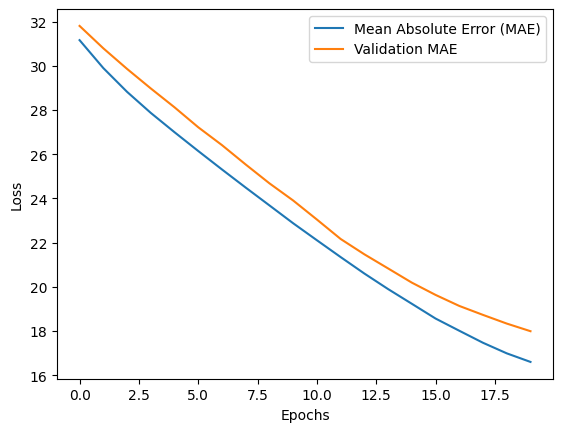

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 1057415104.0000
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 714052992.0000
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 467587360.0000
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 296986432.0000
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 186578512.0000
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 112681696.0000
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 65859092.0000
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 37277700.0000
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 20440350.0000
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 11105414.0000
Epoch 11/20
25/25 [==============================] - 0s 2ms/step - loss: 6071219.0000
Epoch 12/20
25/25 [===========================

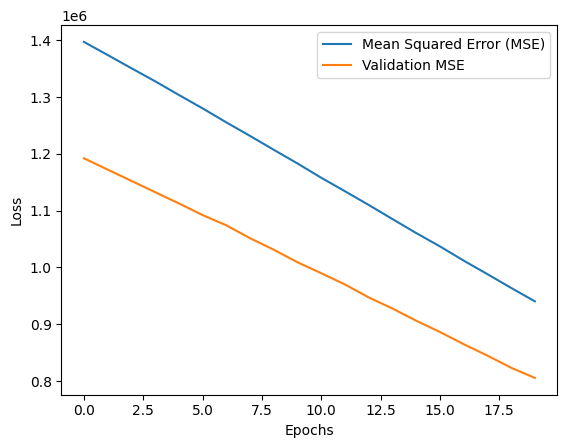

In [241]:
# Select independent variables
X = df3[non_categorical_columns].drop('tempo', axis=1)
y = df3['tempo']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression task
])

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.compile(optimizer='adam', loss='mean_absolute_error')  # L1 Loss

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32)


# Train the model with mean_absolute_error loss
history1 = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Plot Mean Absolute Error Loss
plt.plot(history1.history['loss'], label='Mean Absolute Error (MAE)')
plt.plot(history1.history['val_loss'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.compile(optimizer='adam', loss='mean_squared_error')  # L2 Loss

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)
# Train the model with mean_squared_error loss
history2 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot Mean Squared Error Loss
plt.plot(history2.history['loss'], label='Mean Squared Error (MSE)')
plt.plot(history2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After scaling loss function behave rather well with both of loss functions have quite similar shape.

## 5. non-linear dataset - kernel transformation to linear space and then fit model and assess accuracy.

In [242]:
# Create a copy of the DataFrame to avoid modifying the original data
X = df3[non_categorical_columns].drop('tempo', axis = 1)
X_encoded = X.copy()

lab_enc = preprocessing.LabelEncoder()

# Apply label encoding to each categorical column
for col in non_categorical_columns:
    X_encoded[col] = lab_enc.fit_transform(df3[col])

# Use double brackets to create a DataFrame
y = df3['tempo']
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Non-linear transformation using Kernel PCA with 'rbf' kernel
transformer = KernelPCA(n_components=800, kernel='rbf')
X_train_transformed = transformer.fit_transform(X_train_scaled)
X_test_transformed = transformer.transform(X_test_scaled)

# Fit an SVM model with a non-linear kernel on the transformed data
svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(X_train_transformed, y_train)


# Predict on the test set
y_pred = svm_model.predict(X_test_transformed)

print("X_train_transformed shape:", X_train_transformed.shape)
print("Unique values in y_train:", set(y_train))
print("Unique values in y_pred:", set(y_pred))

# Assess accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


X_train_transformed shape: (800, 800)
Unique values in y_train: {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Unique values in y_pred: {3, 4, 6, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
Accuracy: 0.17


After scaling our input there is 17 % accuracy of our kernel transformation used maximum 800 components but result is still not so well

In [243]:
# Linear regression
# Define response variable
y = df3['tempo']

# Define explanatory variables
x = df3[non_categorical_columns].drop('tempo', axis = 1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     585.6
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:06:34   Log-Likelihood:                -3336.8
No. Observations:                1000   AIC:                             6730.
Df Residuals:                     972   BIC:                             6867.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.4102     10.112      2.513      0.012       5.566      45.254
beats                  1.9345      0.016    122.446      0.000       1.903       1.965
chroma_stft           11.4800      4.954      2.317      0.021       1.758      21.202
rmse                  13.1430      7.821      1.681      0.093      -2.205      28.491
spectral_centroid     -0.0063      0.004     -1.413      0.158      -0.015       0.002
spectral_bandwidth    -0.0047      0.003     -1.417      0.157      -0.011       0.002
rolloff                0.0016      0.002      0.989      0.323      -0.002       0.005
zero_crossing_rate    27.1290     26.551      1.022      0.307     -24.975      79.233
mfcc1                 -0.0223      0.008     -2.823      0.005      -0.038      -0.007
mfcc2                 -0.0787      0.031     -2.564      0.011      -0.139      -0.018
mfcc3                  0.0046      0.024      0.195      0.846      -0.042       0.051
mfcc4                 -0.0765      0.024     -3.186      0.001      -0.124      -0.029
mfcc5                  0.0292      0.035      0.846      0.398      -0.039       0.097
mfcc6                 -0.0722      0.040     -1.785      0.075      -0.152       0.007
mfcc7                 -0.0772      0.048     -1.611      0.108      -0.171       0.017
mfcc8                 -0.0335      0.052     -0.649      0.517      -0.135       0.068
mfcc9                  0.0604      0.052      1.167      0.244      -0.041       0.162
mfcc10                -0.0326      0.059     -0.554      0.580      -0.148       0.083
mfcc11                -0.0415      0.060     -0.698      0.486      -0.158       0.075
mfcc12                -0.0508      0.071     -0.719      0.473      -0.189       0.088
mfcc13                -0.0612      0.070     -0.869      0.385      -0.199       0.077
mfcc14                -0.0796      0.077     -1.029      0.304      -0.231       0.072
mfcc15                -0.1392      0.083     -1.675      0.094      -0.302       0.024
mfcc16                 0.1646      0.079      2.076      0.038       0.009       0.320
mfcc17                -0.0434      0.080     -0.545      0.586      -0.200       0.113
mfcc18                -0.0514      0.086     -0.596      0.552      -0.221       0.118
mfcc19                 0.0112      0.085      0.132      0.895      -0.155       0.177
mfcc20                 0.1597      0.077      2.071      0.039       0.008       0.311
==============================================================================
Omnibus:                     1015.319   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71944.664
Skew:                           4.651   Prob(JB):                         0.00
Kurtosis:                      43.499   Cond. No.                     

High R-squared and Adjusted R-squared values means that the model explains a significantly the variance in temo (DV), but many seperate factors dont have signifiacnt effect

In [244]:
formula = 'tempo ~ chroma_stft +	rmse + spectral_centroid + spectral_bandwidth	+ rolloff +	zero_crossing_rate +	mfcc1 +	mfcc2 + mfcc3 +	mfcc4 + mfcc5 +	mfcc6 + mfcc7 +	mfcc8 + mfcc9 +	mfcc10 + mfcc1 +	mfcc12 + mfcc13 +	mfcc14 +	mfcc15	+ mfcc16  +	mfcc17  +	mfcc18 	+ mfcc19 	+ mfcc20'
model = ols(formula, data=df3).fit()
# Perform ANOVA
anova_table = anova_lm(model, typ=2)

print(anova_table)
print("\n------------------------------")

formula = 'beats ~ chroma_stft +	rmse + spectral_centroid + spectral_bandwidth	+ rolloff +	zero_crossing_rate +	mfcc1 +	mfcc2 + mfcc3 +	mfcc4 + mfcc5 +	mfcc6 + mfcc7 +	mfcc8 + mfcc9 +	mfcc10 + mfcc1 +	mfcc12 + mfcc13 +	mfcc14 +	mfcc15	+ mfcc16  +	mfcc17  +	mfcc18 	+ mfcc19 	+ mfcc20'
model = ols(formula, data=df3).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)

                           sum_sq     df          F    PR(>F)
chroma_stft           6253.227730    1.0   7.997255  0.004781
rmse                  1290.551769    1.0   1.650487  0.199198
spectral_centroid     2279.604309    1.0   2.915387  0.088057
spectral_bandwidth     383.594205    1.0   0.490579  0.483837
rolloff               1549.519090    1.0   1.981680  0.159533
zero_crossing_rate     188.573826    1.0   0.241167  0.623475
mfcc1                  475.630057    1.0   0.608283  0.435624
mfcc2                 3602.267301    1.0   4.606941  0.032089
mfcc3                  623.215059    1.0   0.797030  0.372203
mfcc4                 1569.522873    1.0   2.007263  0.156867
mfcc5                 1402.060457    1.0   1.793096  0.180862
mfcc6                  331.472234    1.0   0.423920  0.515141
mfcc7                  511.777334    1.0   0.654512  0.418702
mfcc8                  640.176705    1.0   0.818722  0.365778
mfcc9                   17.950890    1.0   0.022957  0.879599
mfcc10  

From Annova we can se results are preety similar to previous regression model, with factors divided in significance irregulary.


 ------- regression_results -------
Mean Squared Error (MSE): 42.14358246374053
Root Mean Squared Error (RMSE): 6.491808874554189
Mean Absolute Error (MAE): 4.156052472107735
R-squared (R2): 0.9420374202979777


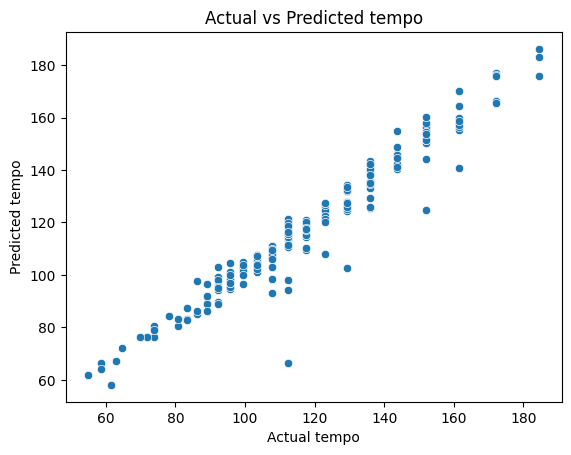

In [245]:
def regression(df):
    # Select independent variables
    y = df['tempo']

    # Define explanatory variables
    X = df.drop('tempo', axis = 1)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the results
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("R-squared (R2):", r2_score(y_test, y_pred))

    # Plot the results
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Actual vs Predicted tempo')
    plt.xlabel('Actual tempo')
    plt.ylabel('Predicted tempo')
    plt.show()

print('\n ------- regression_results -------')
regression(df3[non_categorical_columns])

This regression is a good fit from actual and predicted values. High R-suqared means that IV's in the model are highly effective in explaining the variation in the DV.